In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import os

In [2]:
# 1. LOAD DATA
df = pd.read_csv('cubic_zirconia.csv') 

In [3]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [5]:
df.nunique()

Unnamed: 0    26967
carat           257
cut               5
color             7
clarity           8
depth           169
table           112
x               531
y               526
z               356
price          8742
dtype: int64

In [6]:
lr_df = df.drop('Unnamed: 0', axis=1)
lr_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [7]:
lr_df.shape

(26967, 10)

In [8]:
zero_dimension_rows = lr_df[(lr_df['x'] == 0) | (lr_df['y'] == 0) | (lr_df['z'] == 0)]

print("Number of rows with at least one zero dimension:", zero_dimension_rows.shape[0])
zero_dimension_rows


Number of rows with at least one zero dimension: 9


,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [9]:
print("Number of x = 0 :", (lr_df['x'] == 0).sum())
print("Number of y = 0 :", (lr_df['y'] == 0).sum())
print("Number of z = 0 :", (lr_df['z'] == 0).sum())


Number of x = 0 : 3
Number of y = 0 : 3
Number of z = 0 : 9


In [10]:
#Dropping dimentionless diamonds
lr_df = lr_df.drop(lr_df[lr_df["x"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["y"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["z"]==0].index)
lr_df.shape

(26958, 10)

In [11]:
# Print all fully duplicated rows (entire row identical)
duplicated_rows = lr_df[lr_df.duplicated(keep=False)]

print("All duplicated rows (entire row identical):")
print(duplicated_rows)



All duplicated rows (entire row identical):
       carat        cut color clarity  depth  table     x     y     z  price
106     1.00    Premium     F    VVS2   60.6   54.0  6.56  6.52  3.96   8924
423     0.35    Premium     J     VS1   62.4   58.0  5.67  5.64  3.53    949
1996    1.50    Premium     F     SI2   58.5   60.0  7.52  7.48  4.39   7644
2007    1.52       Good     E      I1   57.3   58.0  7.53  7.42  4.28   3105
2155    0.35      Ideal     F     VS2   61.4   54.0  4.58  4.54  2.80    906
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
25268   1.20    Premium     I     VS2   62.6   58.0  6.77  6.72  4.22   5699
25759   0.30      Ideal     G      IF   62.1   55.0  4.32  4.35  2.69    863
25941   0.51    Premium     F     SI2   58.1   59.0  5.26  5.24  3.05   1052
26191   2.54  Very Good     H     SI2   63.5   56.0  8.68  8.65  5.50  16353
26530   0.41      Ideal     G      IF   61.7   56.0  4.77  4.80  2.95   1367

[64 rows x 10 columns]


In [12]:
lr_df = lr_df.drop_duplicates()

print("Dataset shape after removing duplicates:", lr_df.shape)


Dataset shape after removing duplicates: (26925, 10)


In [13]:
print('cut\n',lr_df.cut.value_counts())
print('\n')
print('color\n',lr_df.color.value_counts())
print('\n')
print('clarity\n',lr_df.clarity.value_counts())
print('\n')

cut
 cut
Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: count, dtype: int64


color
 color
G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: count, dtype: int64


clarity
 clarity
SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: count, dtype: int64




In [14]:
# Missing value count
missing_count = lr_df.isnull().sum()

# Missing value percentage
missing_percentage = (lr_df.isnull().sum() / len(lr_df)) * 100

# Combine into one table
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)


         Missing Count  Missing Percentage (%)
carat                0                0.000000
cut                  0                0.000000
color                0                0.000000
clarity              0                0.000000
depth              697                2.588672
table                0                0.000000
x                    0                0.000000
y                    0                0.000000
z                    0                0.000000
price                0                0.000000


In [15]:
# Drop rows with any missing values
lr_df = lr_df.dropna()

# Verify
lr_df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [16]:
lr_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [17]:
lr_df.shape

(26228, 10)

In [18]:
import numpy as np

# 1. Volume
lr_df['volume'] = lr_df['x'] * lr_df['y'] * lr_df['z']

# 2. Average girdle diameter
lr_df['avg_girdle_diameter'] = (lr_df['x'] + lr_df['y']) / 2

# 3. Average table diameter
lr_df['avg_table_diameter'] = (lr_df['table'] * lr_df['avg_girdle_diameter']) / 100

# 4. Density
# Note: This will result in infinity if volume is 0
lr_df['density'] = lr_df['carat'] / lr_df['volume']

# 5. Length to width ratio
# Using numpy to handle element-wise maximum and minimum comparison
lr_df['length2width_ratio'] = np.maximum(lr_df['x'], lr_df['y']) / np.minimum(lr_df['x'], lr_df['y'])

# check the results
print(lr_df.head())

   carat        cut color clarity  depth  table     x     y     z  price  \
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499   
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984   
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289   
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082   
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779   

       volume  avg_girdle_diameter  avg_table_diameter   density  \
0   48.726678                 4.28              2.4824  0.006157   
1   53.225640                 4.44              2.5752  0.006200   
2  139.726944                 6.08              3.6480  0.006441   
3   68.482560                 4.81              2.6936  0.006133   
4   51.066825                 4.39              2.5901  0.006070   

   length2width_ratio  
0            1.004684  
1            1.009050  
2            1.013245  
3            1.004167  
4            1

In [19]:
import numpy as np

# Overwrite the 'price' column with its log-transformed values
lr_df['price'] = np.log(lr_df['price'])

# Verify the change
print(lr_df['price'].head())

0    6.212606
1    6.891626
2    8.746557
3    6.986566
4    6.658011
Name: price, dtype: float64


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- 1. Define your columns ---
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 
            'avg_girdle_diameter', 'avg_table_diameter', 'density', 'length2width_ratio']
cat_cols = ['cut', 'color', 'clarity']

# --- 2. Define the Order for Ordinal Variables ---
# (Worst to Best)
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# --- 3. Separate features and target ---
# We generally do NOT include Price in the clustering data (X)
X = lr_df.drop('price', axis=1) 
y = lr_df['price']

# --- 4. Define the Preprocessing Pipeline ---
# We use pipelines to chain steps: Encode -> Then Scale
cat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories=[cut_order, color_order, clarity_order])),
    ('scaler', StandardScaler()) # Scale the categories (0-7) so they match the numericals
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler()) # Switched to StandardScaler to fix "1 cluster" issue
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ],
    verbose_feature_names_out=False
)

# --- 5. Apply preprocessing ---
# This results in a numpy array where ALL columns are scaled
X_processed = preprocessor.fit_transform(X)

# --- 6. Convert back to DataFrame ---
X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())

# Note: Do NOT add 'price' back if you are about to run Clustering.
# X_processed_df is now ready for KMeans.fit()

print("Processing complete. Data is scaled and ordered correctly.")
print(X_processed_df.head())



Processing complete. Data is scaled and ordered correctly.
      carat     depth     table         x         y         z    volume  \
0 -1.043860  0.251046  0.244301 -1.296622 -1.239281 -1.260719 -1.011921   
1 -0.980904 -0.669766  0.244301 -1.163287 -1.093235 -1.203245 -0.955829   
2  0.215256  0.321878  1.141174  0.276727  0.332867  0.348556  0.122647   
3 -0.792037 -0.103112 -0.652572 -0.807728 -0.801142 -0.829663 -0.765609   
4 -1.022874 -0.953093  0.692737 -1.225510 -1.119008 -1.275087 -0.982744   

   avg_girdle_diameter  avg_table_diameter   density  length2width_ratio  \
0            -1.279825           -1.182790  0.153006           -0.094275   
1            -1.138663           -1.048110  0.376389            0.016047   
2             0.308253            0.508832  1.622368            0.122056   
3            -0.812224           -0.876278  0.029794           -0.107343   
4            -1.182776           -1.026486 -0.293030            0.252083   

        cut     color   clarity  

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
# Split X and y into training and test set in 80:20 ratio

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.20, random_state=1)


print("--- Data Split Complete For X ---")
print(f"Training set shape: {X_train.shape} (80%)")
print(f"Testing set shape:  {X_test.shape} (20%)")

print("--- Data Split Complete For y ---")
print(f"Training set shape: {y_train.shape} (80%)")
print(f"Testing set shape:  {y_test.shape} (20%)")

X_train.head(5)




--- Data Split Complete For X ---
Training set shape: (20982, 14) (80%)
Testing set shape:  (5246, 14) (20%)
--- Data Split Complete For y ---
Training set shape: (20982,) (80%)
Testing set shape:  (5246,) (20%)


,carat,depth,table,x,y,z,volume,avg_girdle_diameter,avg_table_diameter,density,length2width_ratio,cut,color,clarity
8825,-0.771051,-0.103112,0.692737,-0.798839,-0.741005,-0.786558,-0.742563,-0.776934,-0.632607,-0.068433,-0.003365,-0.817760,0.352438,-0.641184
32,-0.057553,-0.669766,-0.652572,0.196726,0.143866,0.089922,-0.043784,0.171502,0.029907,-0.177507,0.001512,0.080670,0.939044,0.572950
11793,-0.204449,-0.032280,-1.101008,-0.007720,0.023592,0.003711,-0.165281,0.008283,-0.203751,-0.648300,-0.035925,0.979099,0.352438,0.572950
3339,0.634961,-1.590578,0.692737,0.925622,0.831144,0.679032,0.648320,0.886137,0.981444,-0.411121,0.051372,0.080670,0.352438,-0.641184
25462,2.544619,-1.165588,1.589610,2.143412,1.999516,1.914724,2.364171,2.090430,2.385348,0.845637,0.038177,0.080670,-0.820775,-0.034117


In [22]:
y_train.head(5)

9071     6.674561
33       8.089482
12132    8.056427
3437     8.669227
26185    9.744961
Name: price, dtype: float64

Calculating optimal k (this may take a moment)...
k=2: Silhouette Score = 0.3568
k=3: Silhouette Score = 0.3572
k=4: Silhouette Score = 0.2732
k=5: Silhouette Score = 0.2568
k=6: Silhouette Score = 0.1845
k=7: Silhouette Score = 0.1828
k=8: Silhouette Score = 0.1832
k=9: Silhouette Score = 0.1723
k=10: Silhouette Score = 0.1565

OPTIMAL NUMBER OF CLUSTERS: k = 3
Highest Silhouette Score: 0.3572


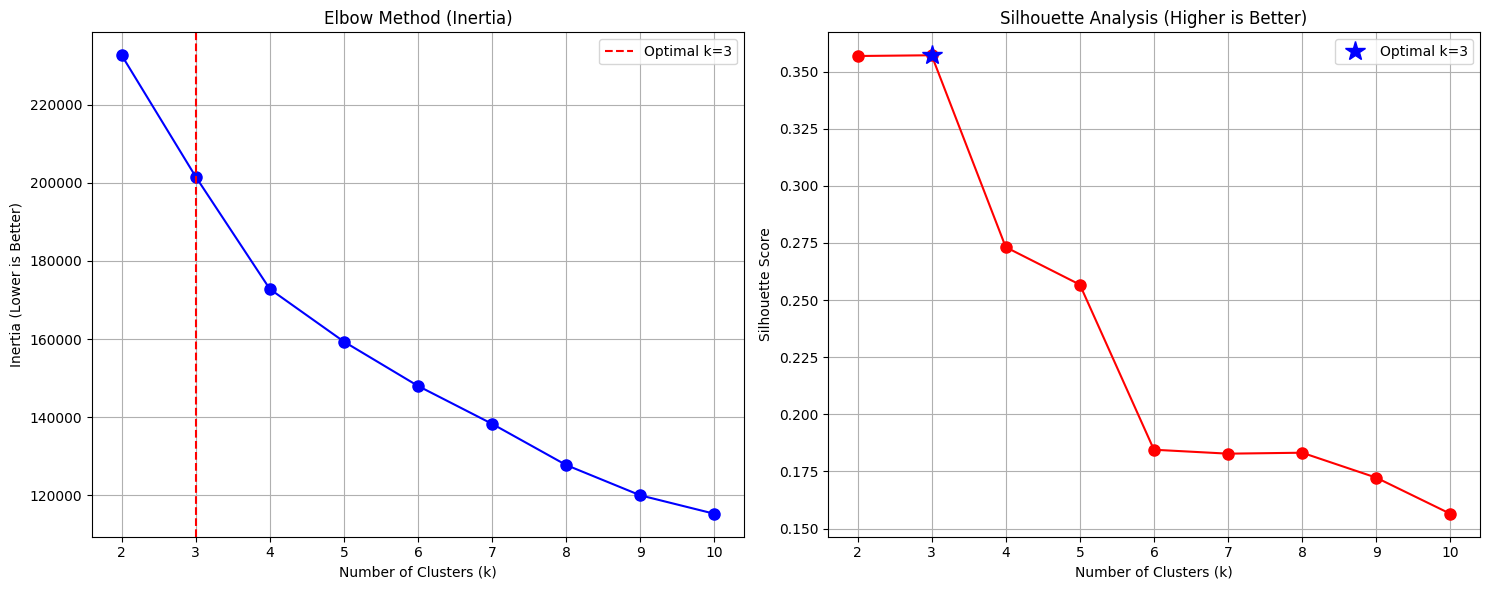

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- 1. Setup Storage ---
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Checking k=2 to k=10

print("Calculating optimal k (this may take a moment)...")

# --- 2. Loop through K values ---
for k in K_range:
    # Initialize and Fit
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed_df)  # Make sure to use your PROCESSED (Scaled) data
    
    # Store Inertia (Elbow Method)
    inertia.append(kmeans.inertia_)
    
    # Store Silhouette Score
    # Note: If dataset is huge (>50k rows), sample it for speed:
    # score = silhouette_score(X_processed_df.sample(5000), kmeans.predict(X_processed_df.sample(5000)))
    score = silhouette_score(X_processed_df, kmeans.labels_)
    silhouette_scores.append(score)
    
    print(f"k={k}: Silhouette Score = {score:.4f}")

# --- 3. Determine Optimal K Mathematically ---
# We pick the k with the HIGHEST Silhouette Score
best_score = max(silhouette_scores)
best_k = K_range[silhouette_scores.index(best_score)]

print("\n" + "="*40)
print(f"OPTIMAL NUMBER OF CLUSTERS: k = {best_k}")
print(f"Highest Silhouette Score: {best_score:.4f}")
print("="*40)

# --- 4. Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Elbow Method
ax1.plot(K_range, inertia, 'bo-', markersize=8)
# Mark the "Best K" on this plot too for reference
ax1.axvline(x=best_k, color='r', linestyle='--', label=f'Optimal k={best_k}')
ax1.set_title('Elbow Method (Inertia)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Lower is Better)')
ax1.legend()
ax1.grid(True)

# Plot 2: Silhouette Analysis
ax2.plot(K_range, silhouette_scores, 'ro-', markersize=8)
# Highlight the max point
ax2.plot(best_k, best_score, 'b*', markersize=15, label=f'Optimal k={best_k}')
ax2.set_title('Silhouette Analysis (Higher is Better)')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
from sklearn.cluster import KMeans

# --- 1. Initialize KMeans with k=3 ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# --- 2. Fit the model directly on X_train ---
# (Assumes X_train is the numeric/prepared data you want to use)
kmeans.fit(X_train)

# --- 3. Assign the cluster labels back to X_train ---
X_train['cluster'] = kmeans.labels_

# --- 4. Verify Results ---
print("First 5 rows of X_train with clusters:")
print(X_train.head())

print("\nCluster Distribution:")
print(X_train['cluster'].value_counts())

First 5 rows of X_train with clusters:
          carat     depth     table         x         y         z    volume  \
8825  -0.771051 -0.103112  0.692737 -0.798839 -0.741005 -0.786558 -0.742563   
32    -0.057553 -0.669766 -0.652572  0.196726  0.143866  0.089922 -0.043784   
11793 -0.204449 -0.032280 -1.101008 -0.007720  0.023592  0.003711 -0.165281   
3339   0.634961 -1.590578  0.692737  0.925622  0.831144  0.679032  0.648320   
25462  2.544619 -1.165588  1.589610  2.143412  1.999516  1.914724  2.364171   

       avg_girdle_diameter  avg_table_diameter   density  length2width_ratio  \
8825             -0.776934           -0.632607 -0.068433           -0.003365   
32                0.171502            0.029907 -0.177507            0.001512   
11793             0.008283           -0.203751 -0.648300           -0.035925   
3339              0.886137            0.981444 -0.411121            0.051372   
25462             2.090430            2.385348  0.845637            0.038177   

     

In [25]:
# --- 1. Predict Clusters for X_test ---
# Use the trained 'kmeans' model from the previous step
test_labels = kmeans.predict(X_test)

# --- 2. Assign the cluster labels to X_test ---
X_test['cluster'] = test_labels


# --- 4. Verify Results ---
print("First 5 rows of X_train with clusters:")
print(X_test.head())

# --- 3. Print Count for Each Cluster in Test Set ---
print("Number of observations in each cluster (Test Set):")
print(X_test['cluster'].value_counts())



First 5 rows of X_train with clusters:
          carat     depth     table         x         y         z    volume  \
16436 -1.022874  1.030195 -1.101008 -1.261066 -1.204917 -1.160139 -0.984225   
2074  -0.687110 -0.315607 -0.652572 -0.621059 -0.586367 -0.642872 -0.640831   
20437 -0.603169  0.109383 -0.652572 -0.541059 -0.491866 -0.513556 -0.571979   
23372 -0.372331  0.109383 -1.549444 -0.221056 -0.199773 -0.197448 -0.341788   
7659  -1.043860  1.242690  0.244301 -1.332178 -1.222099 -1.188876 -1.003441   

       avg_girdle_diameter  avg_table_diameter   density  length2width_ratio  \
16436            -1.244535           -1.337207 -0.219916           -0.095373   
2074             -0.609303           -0.689352 -0.719364           -0.112157   
20437            -0.521077           -0.608080 -0.292990           -0.015218   
23372            -0.212284           -0.482979 -0.397829           -0.120408   
7659             -1.288648           -1.191207 -0.284976            0.265266   

     

In [26]:
!python -m pip install xgboost




Defaulting to user installation because normal site-packages is not writeable


Calculating Learning Curve for Cluster 0 using XGBoost...
Calculating Learning Curve for Cluster 1 using XGBoost...
Calculating Learning Curve for Cluster 2 using XGBoost...


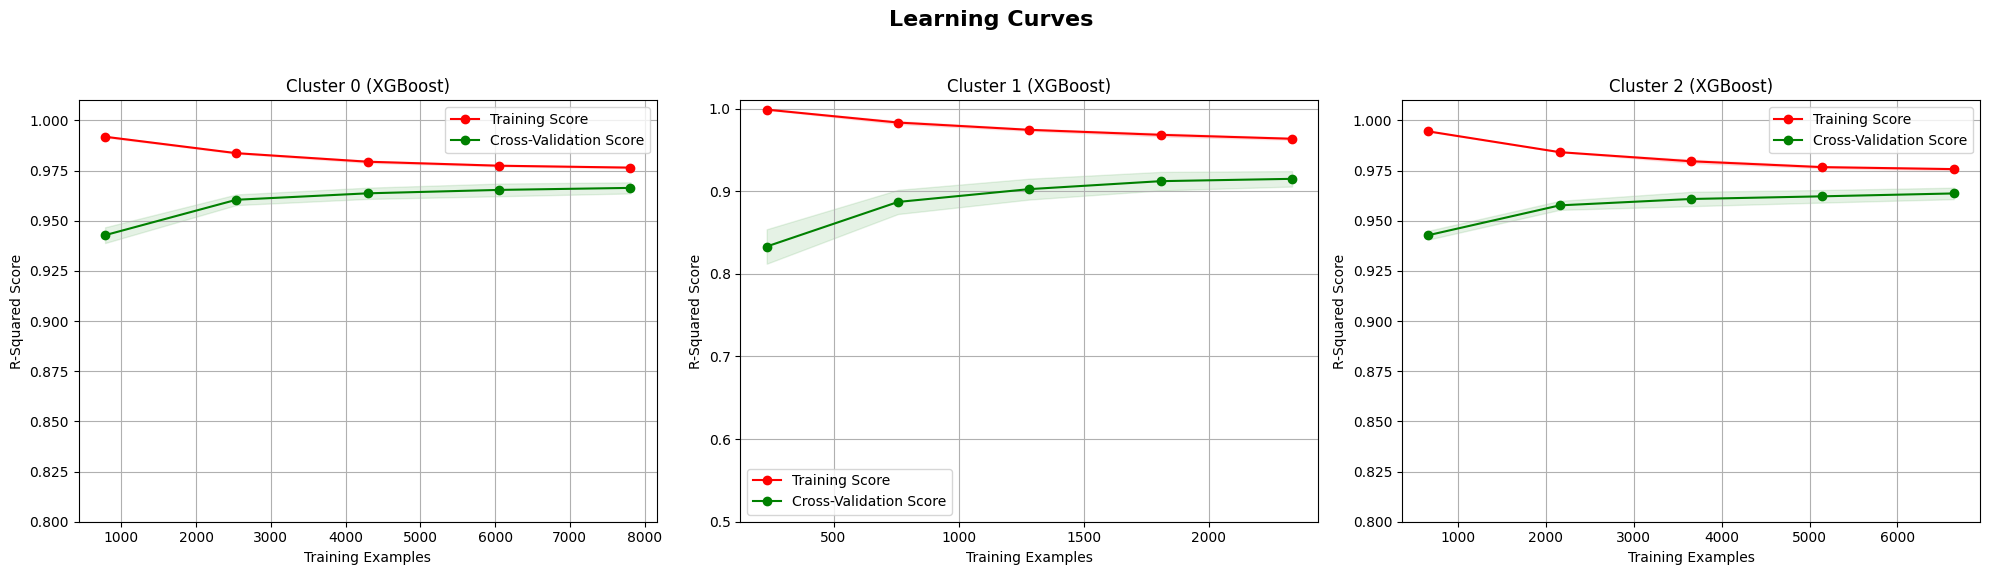

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# --- Configuration ---
xgb_params = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}

# --- Plotting Setup ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Learning Curves ', fontsize=16, weight='bold')

# --- Loop Through Clusters ---
for cluster_id in [0, 1, 2]:
    
    # 1. Filter Data
    # Create the mask first
    mask = (X_train['cluster'] == cluster_id)
    
    X_train_c = X_train[mask].drop(columns=['cluster'])
    
    # FIX: Use .values on the mask to avoid "Unalignable boolean Series" error
    # This tells pandas to ignore the index and just filter by row position
    y_train_c = y_train[mask.values] 
    
    # 2. SELECT MODEL BASED ON CLUSTER
    # FIX: Changed condition from '== 3' to '== 1' so Linear Regression actually runs
    if cluster_id == 3:
        # Cluster 1: Use Linear Regression
        model = LinearRegression()
        model_name = "Linear Regression"
    else:
        # Cluster 0 & 2: Use XGBoost
        model = XGBRegressor(**xgb_params, random_state=42)
        model_name = "XGBoost"

    # 3. Compute Learning Curve
    print(f"Calculating Learning Curve for Cluster {cluster_id} using {model_name}...")
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, 
        X_train_c, 
        y_train_c, 
        cv=5, 
        scoring='r2', 
        n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    # 4. Calculate Stats
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # 5. Plotting
    ax = axes[cluster_id]
    ax.set_title(f"Cluster {cluster_id} ({model_name})")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("R-Squared Score")
    
    # Adjust Y-limit
    if cluster_id == 1:
        ax.set_ylim(0.5, 1.01) 
    else:
        ax.set_ylim(0.8, 1.01) 
        
    ax.grid(True)
    
    # Plot Training Score (Red)
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    
    # Plot Cross-Validation Score (Green)
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    ax.legend(loc="best")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Generating PDP for Cluster 0 (XGBoost)...


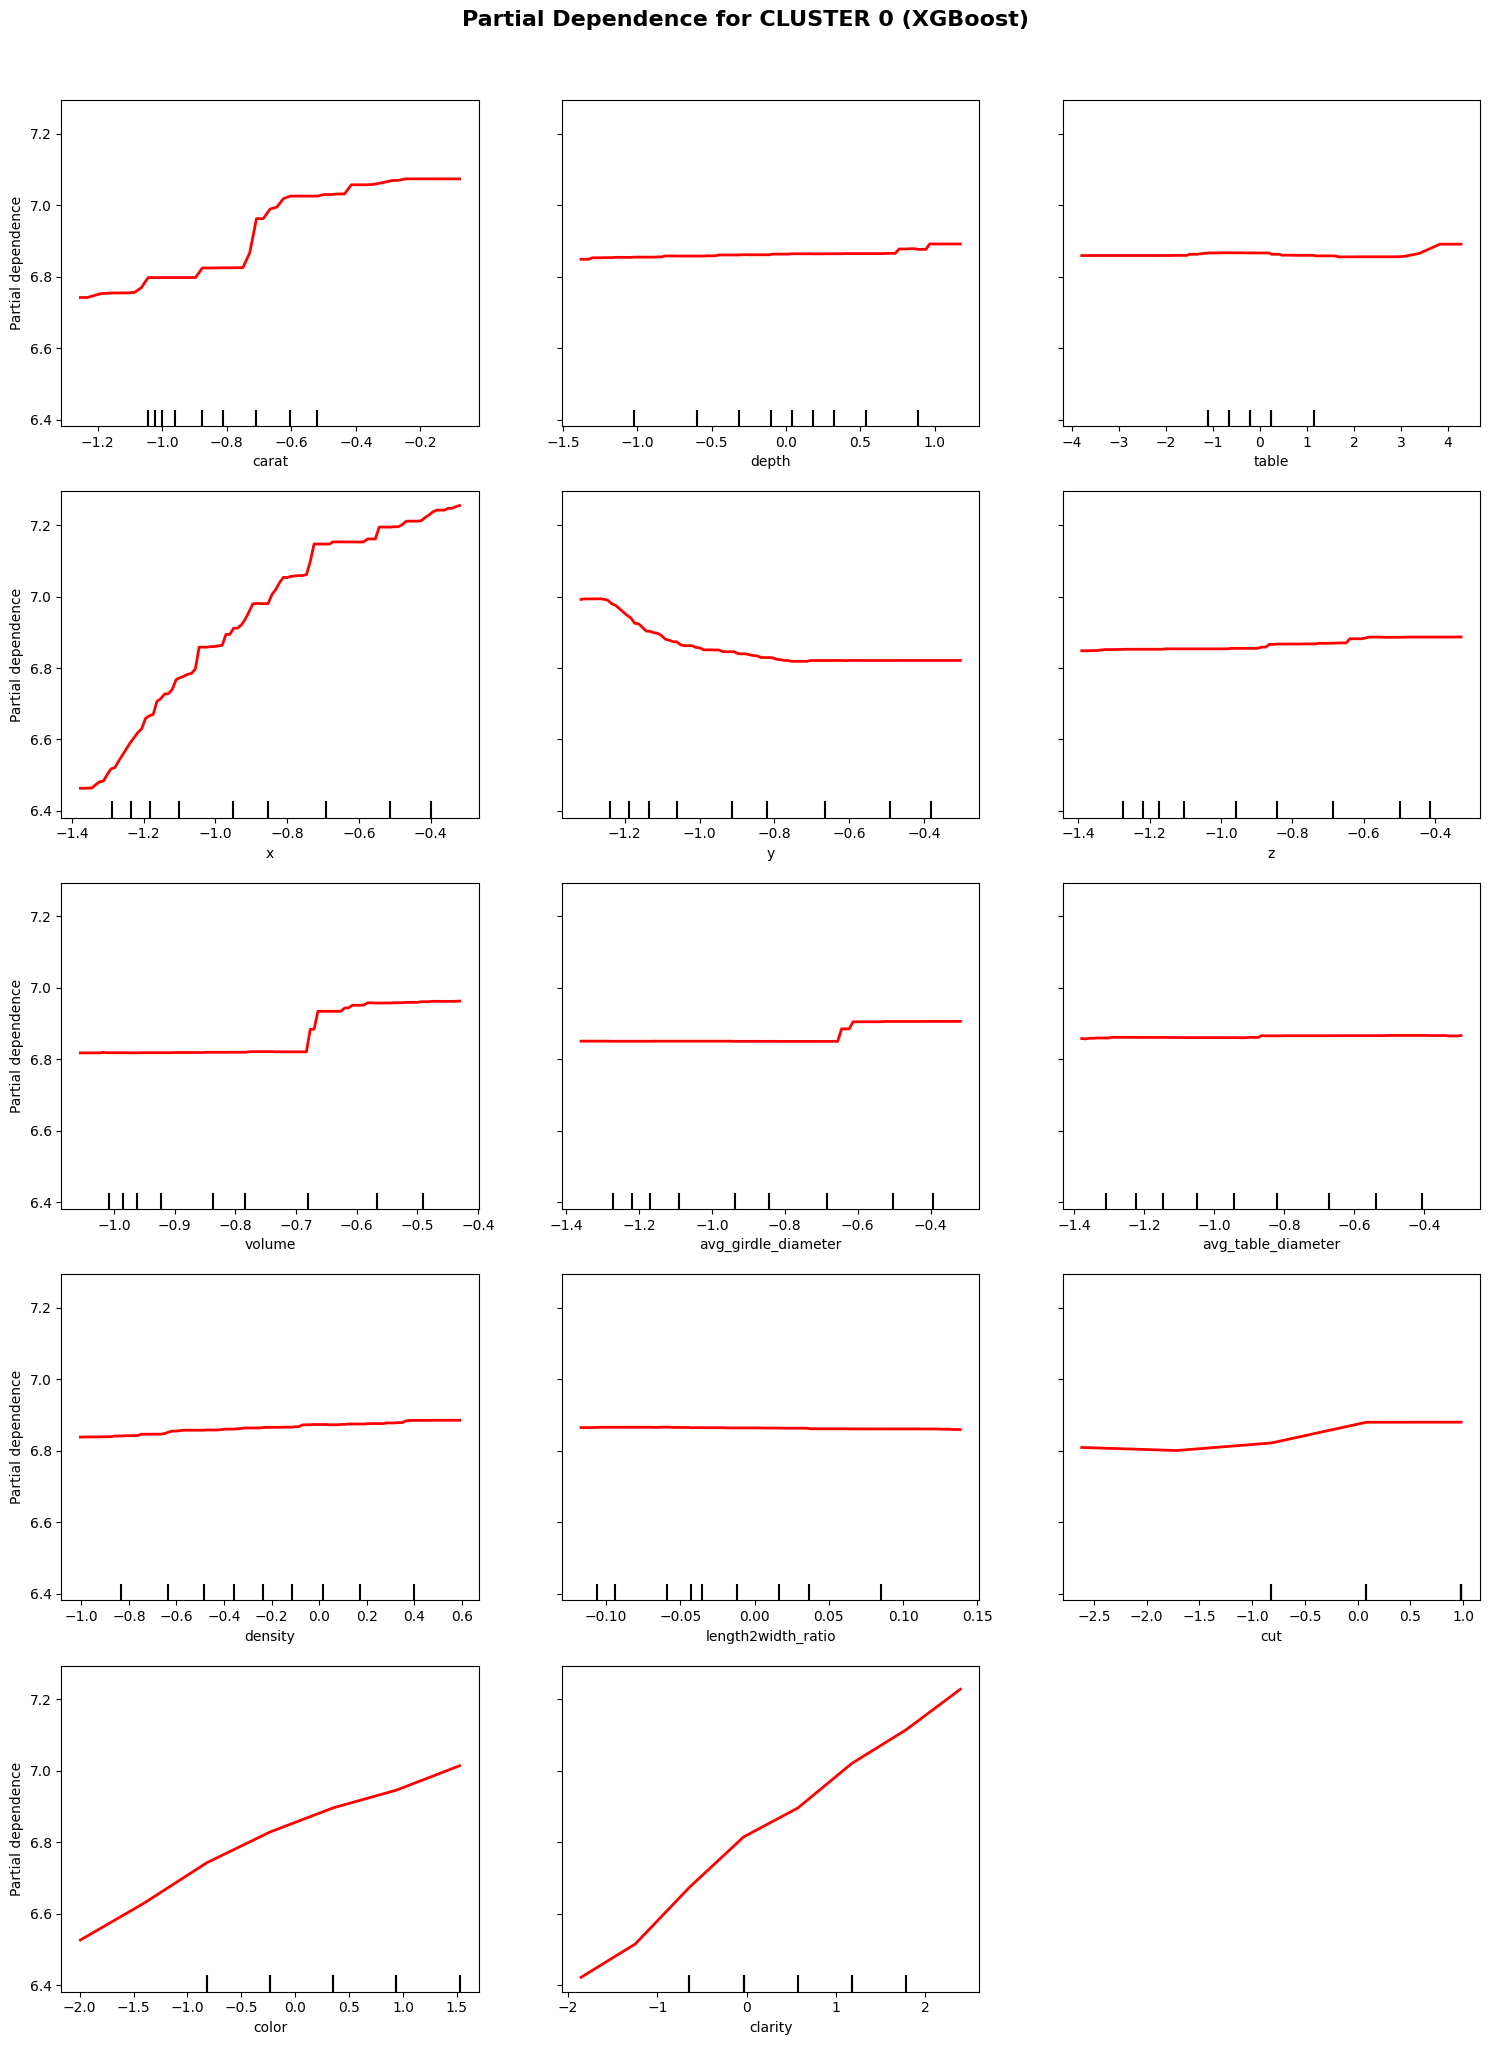

Generating PDP for Cluster 1 (XGBoost)...


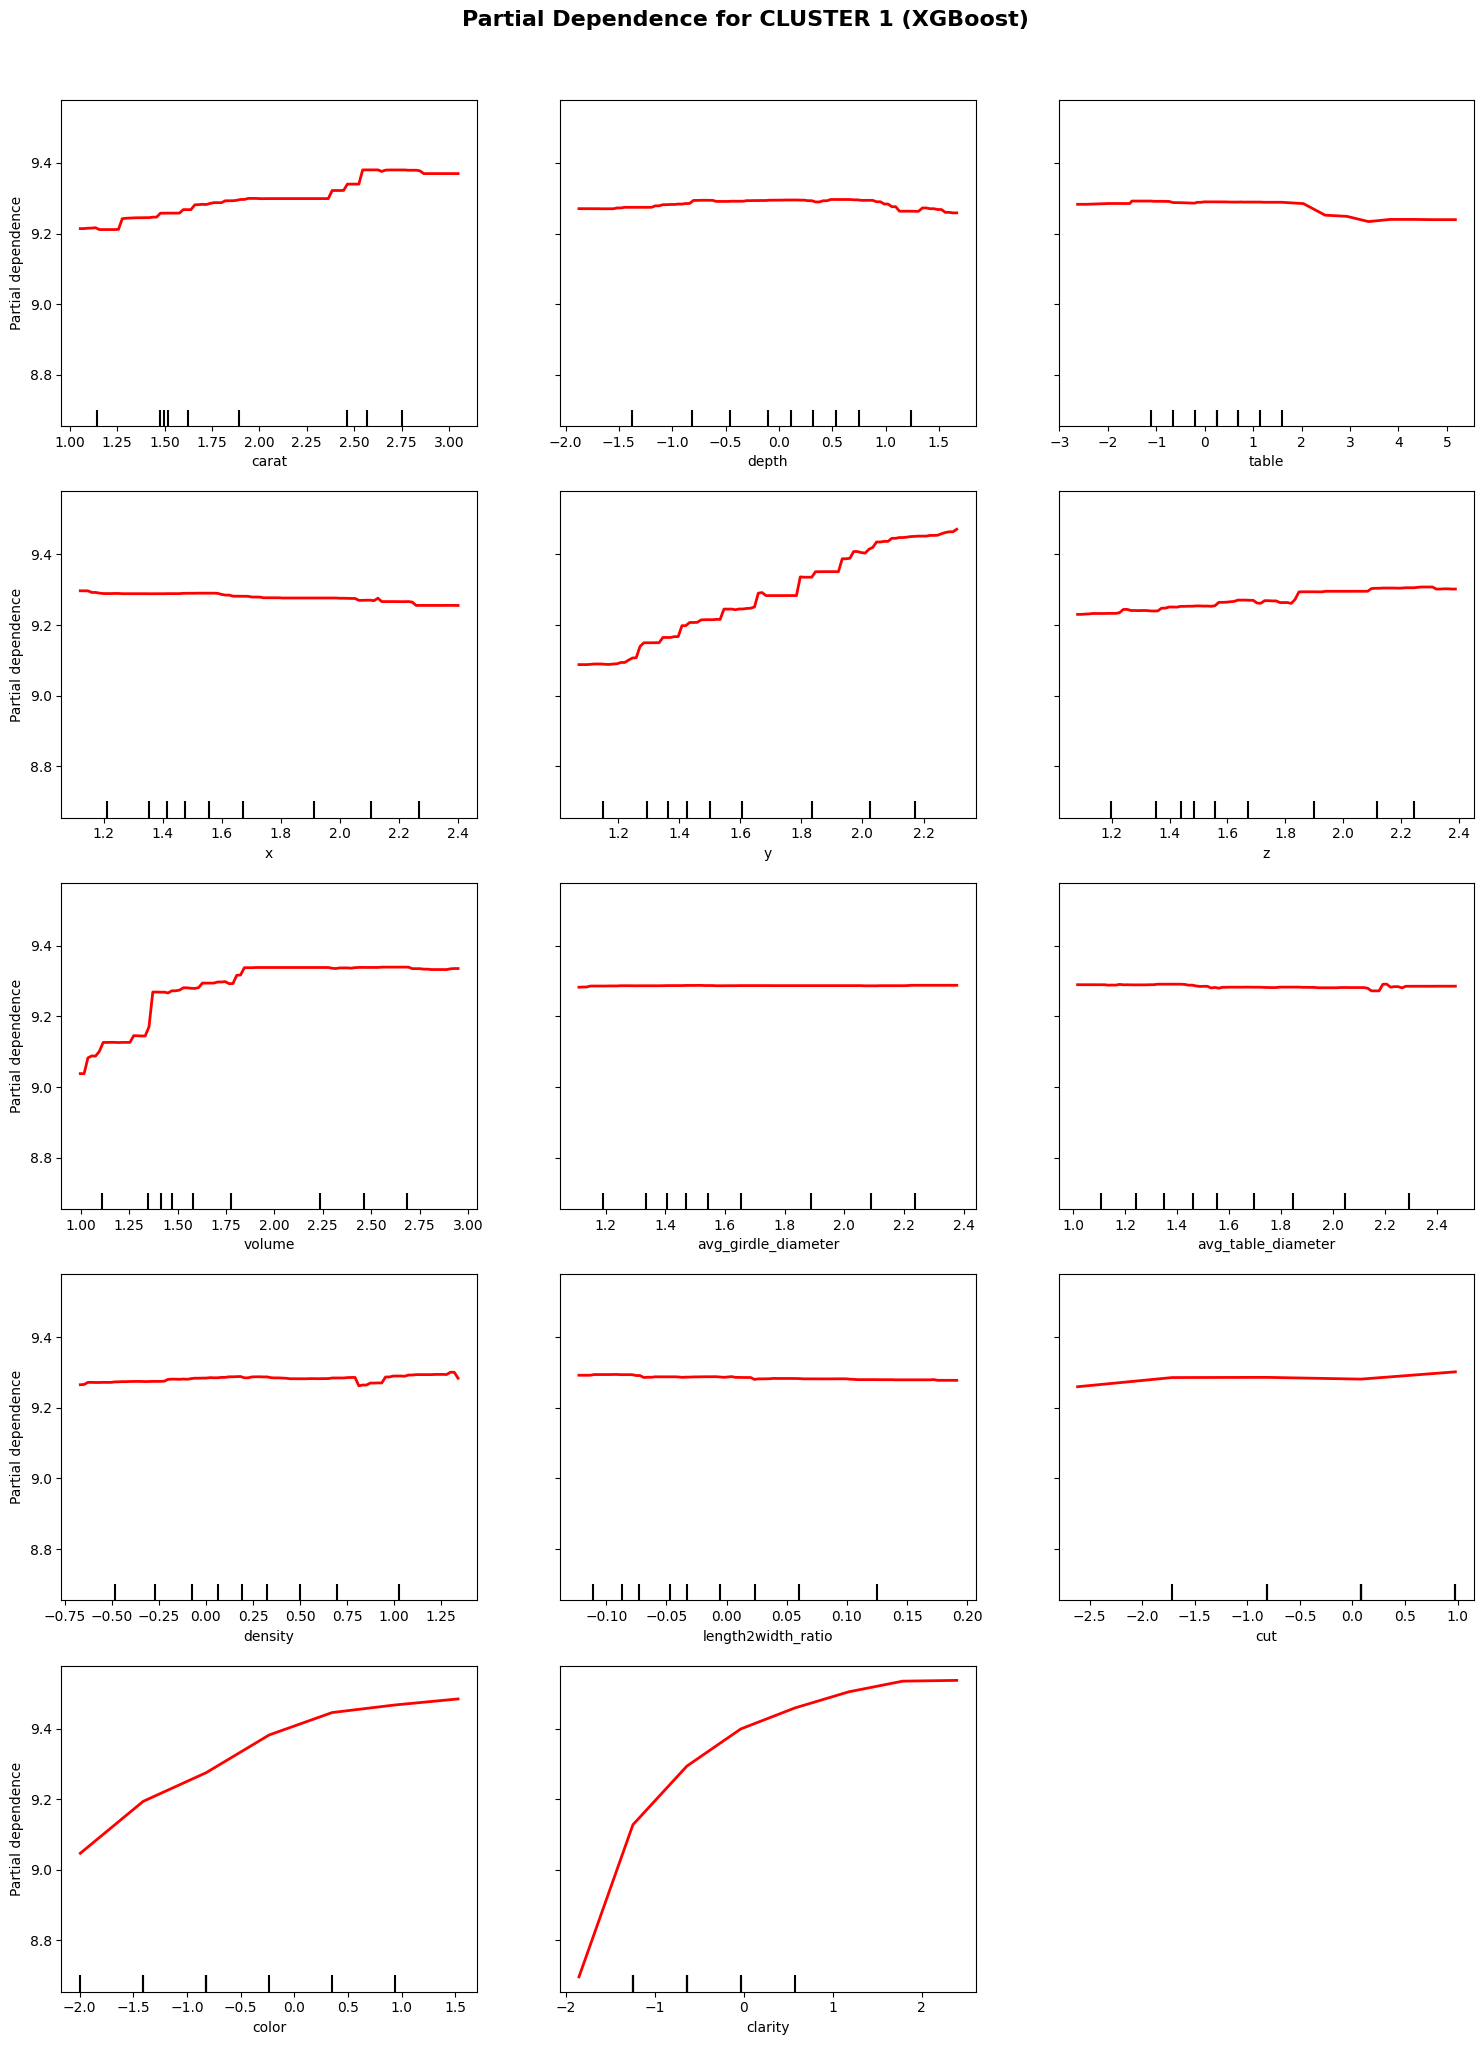

Generating PDP for Cluster 2 (XGBoost)...


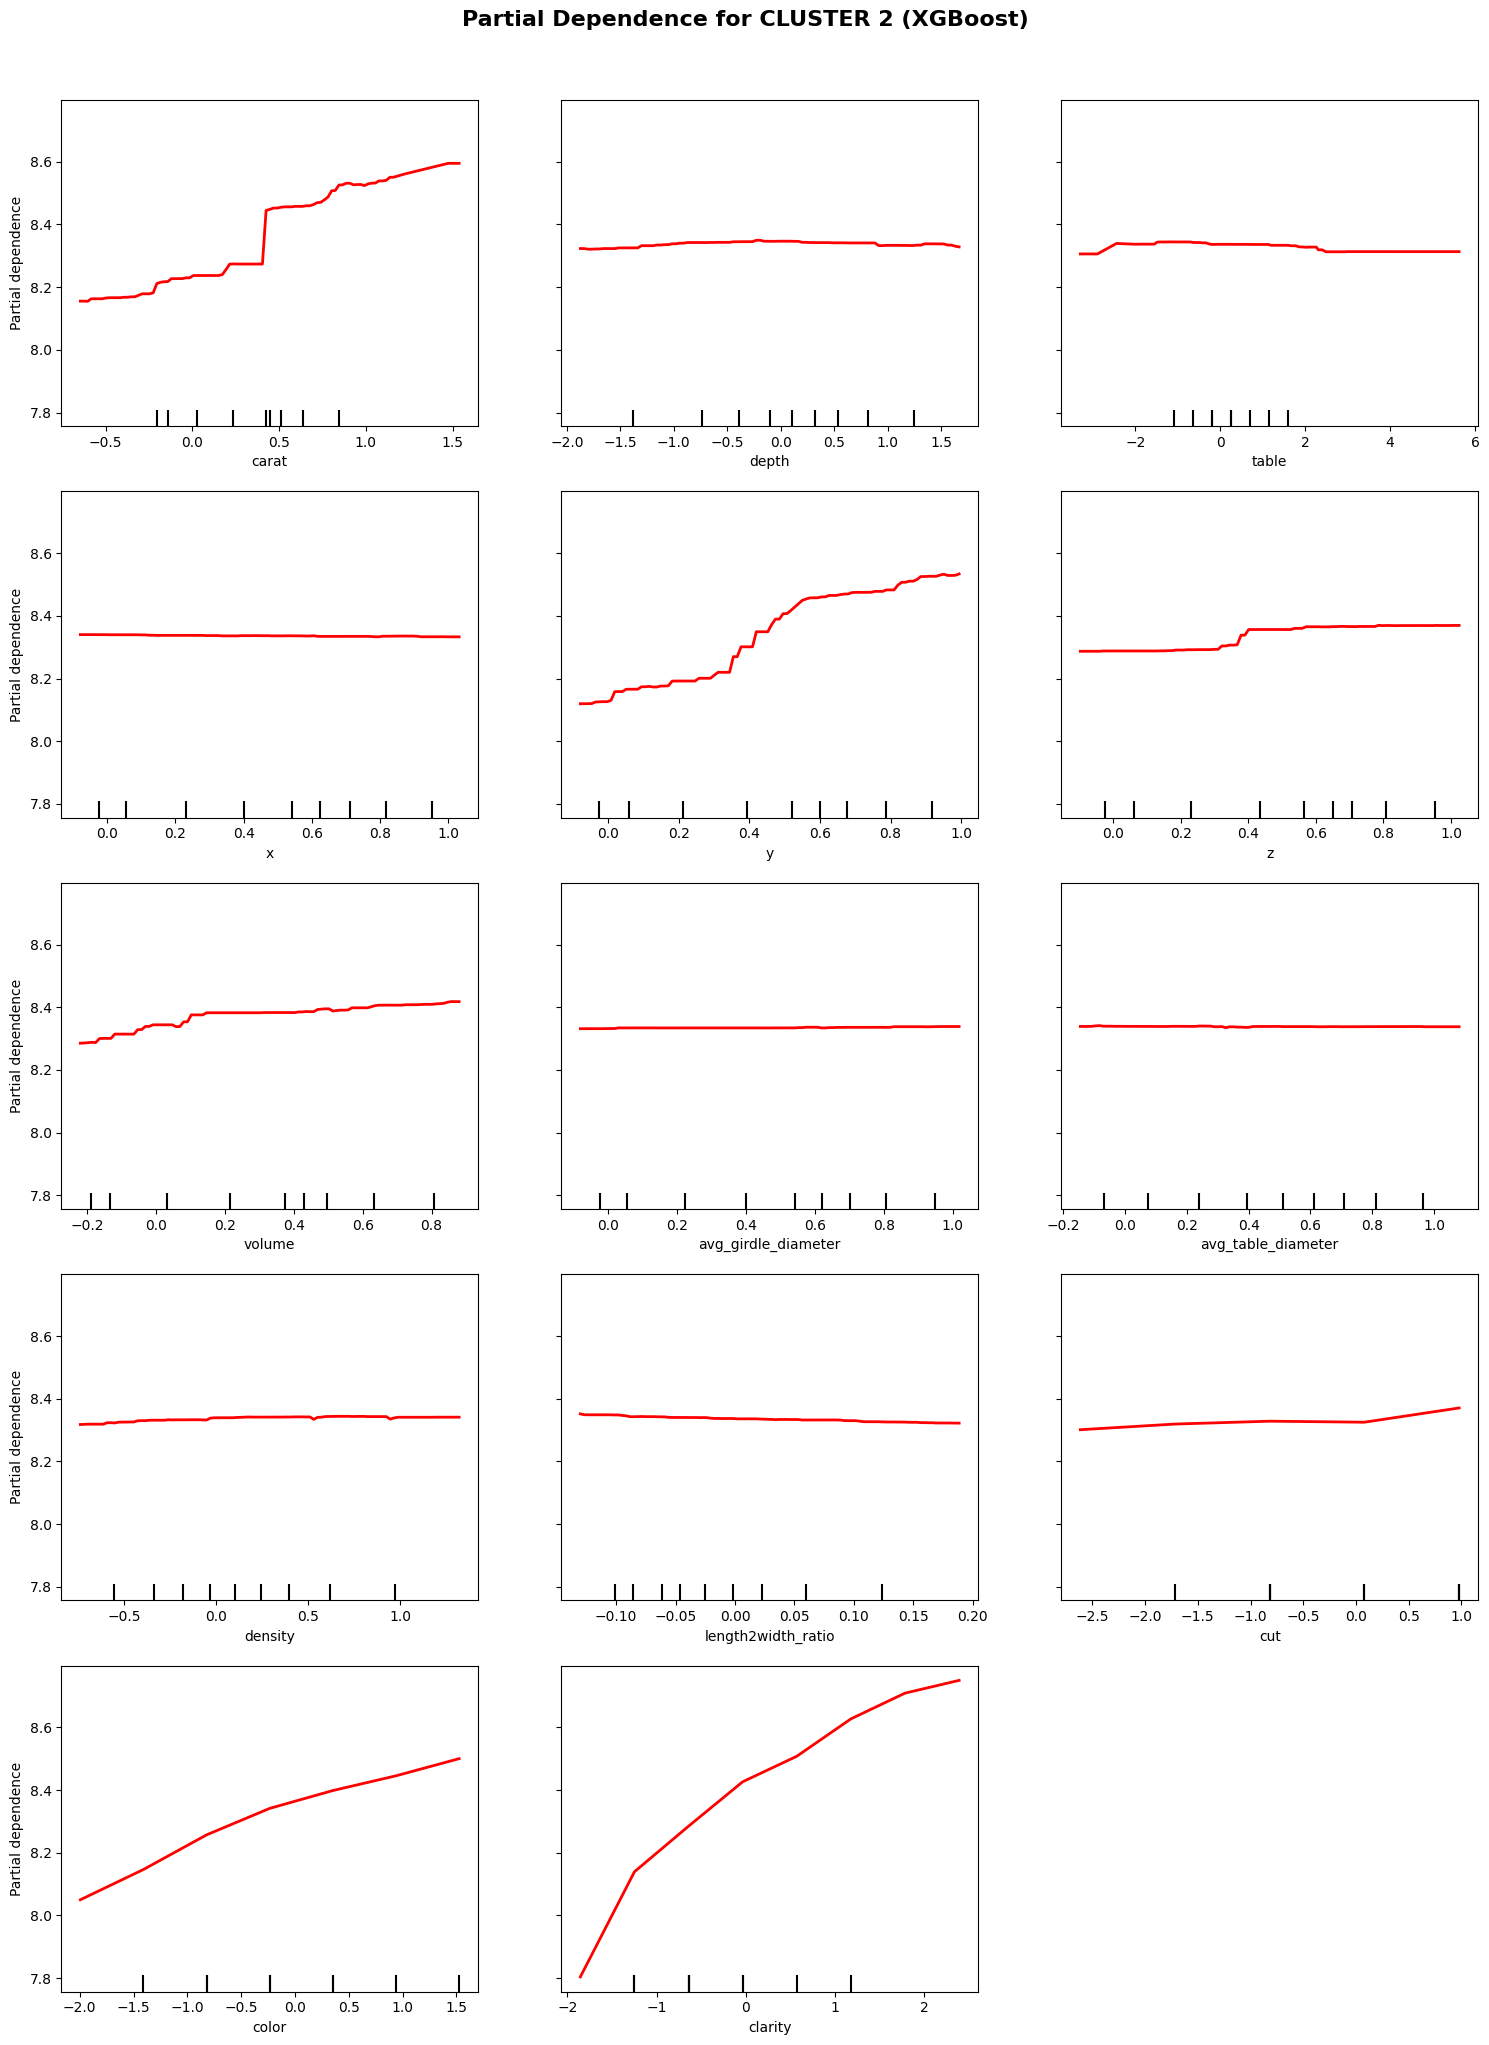

In [28]:
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# --- Configuration ---
xgb_params = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 5}

rf_params = {
    'n_estimators': 200,
    'max_depth': None,
    'random_state': 42,
    'n_jobs': -1
}

# --- Loop Through Clusters ---
for cluster_id in [0, 1, 2]:
    
    # 1. Prepare Data
    # Create a boolean mask first
    mask = (X_train['cluster'] == cluster_id)
    
    X_train_c = X_train[mask].drop(columns=['cluster'])
    
    # FIX: Use .values to ignore index alignment issues
    y_train_c = y_train[mask.values]
    
    features_to_plot = X_train_c.columns.tolist()
    
    # 2. SELECT MODEL BASED ON CLUSTER
    # FIX: Changed from '== 3' to '== 1' so the Random Forest logic actually runs
    if cluster_id == 3:
        print(f"Generating PDP for Cluster {cluster_id} (Random Forest)...")
        model = RandomForestRegressor(**rf_params)
        model_name = "Random Forest"
        line_color = "blue"
    else:
        print(f"Generating PDP for Cluster {cluster_id} (XGBoost)...")
        model = XGBRegressor(**xgb_params, random_state=42)
        model_name = "XGBoost"
        line_color = "red"

    # Train the selected model
    model.fit(X_train_c, y_train_c)
    
    # 3. Generate Plot
    n_cols = 3
    n_features = len(features_to_plot)
    n_rows = math.ceil(n_features / n_cols)
    
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(15, 4 * n_rows))
    
    display = PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_train_c,
        features=features_to_plot,
        kind="average",
        n_cols=n_cols,
        line_kw={"color": line_color, "linewidth": 2},
        ax=ax # Pass the axes to the display object
    )
    
    # Customize Figure
    fig.suptitle(
        f'Partial Dependence for CLUSTER {cluster_id} ({model_name})',
        fontsize=16,
        weight='bold',
        y=1.02
    )
    
    plt.tight_layout()
    plt.show()

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import display  # Re-import to fix the overwritten variable

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# -------------------------------
# Define models
# -------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Elastic Net": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "PLS Regression": PLSRegression(n_components=2),
    "Random Forest": RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=5,
        random_state=42, n_jobs=1
    )
}

# -------------------------------
# Storage for results
# -------------------------------
results = []

# -------------------------------
# Loop over clusters and models
# -------------------------------
for cluster_id in [0, 1, 2]:
    
    # --- Fix for Training Data ---
    mask_train = (X_train["cluster"] == cluster_id)
    X_train_c = X_train[mask_train].drop(columns=["cluster"])
    y_train_c = y_train[mask_train.values] # Use .values to fix indexing error

    # --- Fix for Test Data ---
    mask_test = (X_test["cluster"] == cluster_id)
    X_test_c = X_test[mask_test].drop(columns=["cluster"])
    y_test_c = y_test[mask_test.values]

    for model_name, model in models.items():

        # Fit model
        model.fit(X_train_c, y_train_c)

        # Predictions
        y_train_pred = model.predict(X_train_c)
        y_test_pred = model.predict(X_test_c)
        
        # Flatten if needed
        if y_train_pred.ndim > 1: y_train_pred = y_train_pred.ravel()
        if y_test_pred.ndim > 1: y_test_pred = y_test_pred.ravel()

        # Metrics
        results.append({
            "Cluster": cluster_id,
            "Model": model_name,
            "Train R2": r2_score(y_train_c, y_train_pred),
            "Train RMSE": np.sqrt(mean_squared_error(y_train_c, y_train_pred)),
            "Test R2": r2_score(y_test_c, y_test_pred),
            "Test RMSE": np.sqrt(mean_squared_error(y_test_c, y_test_pred))
        })

# -------------------------------
# Final results table
# -------------------------------
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(
    by=["Cluster", "Test R2"], ascending=[True, False]
)

# Now display() will work correctly
display(results_df)

,Cluster,Model,Train R2,Train RMSE,Test R2,Test RMSE
6,0,XGBoost,0.975644,0.073691,0.965442,0.089681
5,0,Random Forest,0.995165,0.032831,0.963527,0.092132
0,0,Linear Regression,0.934929,0.120450,0.936524,0.121544
1,0,Ridge Regression,0.934498,0.120848,0.935869,0.122169
3,0,Elastic Net,0.920566,0.133081,0.922033,0.134705
2,0,Lasso Regression,0.919214,0.134208,0.919276,0.137065
4,0,PLS Regression,0.908188,0.143074,0.910672,0.144185
13,1,XGBoost,0.959926,0.074299,0.906776,0.108814
12,1,Random Forest,0.987229,0.041944,0.893650,0.116223
7,1,Linear Regression,0.829987,0.153035,0.815588,0.153044


In [30]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from scipy.stats import randint, uniform
from IPython.display import display

# ---------------------------------
# Models WITHOUT tuning (Fixed)
# ---------------------------------
base_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Elastic Net": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "PLS Regression": PLSRegression(n_components=2)
}

# ---------------------------------
# Hyperparameter search spaces
# ---------------------------------
rf_param_dist = {
    "n_estimators": randint(100, 400),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5)
}

xgb_param_dist = {
    "n_estimators": randint(50, 300),
    "max_depth": randint(3, 10),
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4)
}

# ---------------------------------
# Storage
# ---------------------------------
results = []

# ---------------------------------
# Loop over clusters
# ---------------------------------
for cluster_id in [0, 1, 2]:

    print(f"\n===== CLUSTER {cluster_id} =====")

    # --- FIX: Create masks first ---
    mask_train = (X_train["cluster"] == cluster_id)
    mask_test = (X_test["cluster"] == cluster_id)

    # --- FIX: Use masks safely ---
    X_train_c = X_train[mask_train].drop(columns=["cluster"])
    # Use .values to avoid IndexingError on y
    y_train_c = y_train[mask_train.values]

    X_test_c = X_test[mask_test].drop(columns=["cluster"])
    y_test_c = y_test[mask_test.values]

    # -------- Base models (no tuning) --------
    for name, model in base_models.items():
        model.fit(X_train_c, y_train_c)

        y_tr = model.predict(X_train_c)
        y_te = model.predict(X_test_c)
        
        if y_tr.ndim > 1: y_tr = y_tr.ravel()
        if y_te.ndim > 1: y_te = y_te.ravel()

        results.append({
            "Cluster": cluster_id,
            "Model": name,
            "Train R2": r2_score(y_train_c, y_tr),
            "Train RMSE": np.sqrt(mean_squared_error(y_train_c, y_tr)),
            "Test R2": r2_score(y_test_c, y_te),
            "Test RMSE": np.sqrt(mean_squared_error(y_test_c, y_te)),
            "Best Params": "Fixed" # Label for non-tuned models
        })

    # -------- Random Forest (TUNED) --------
    print(f"  > Tuning Random Forest...")
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)

    rf_search = RandomizedSearchCV(
        rf, rf_param_dist, n_iter=30, cv=5, scoring="r2", random_state=42, n_jobs=-1
    )

    rf_search.fit(X_train_c, y_train_c)
    best_rf = rf_search.best_estimator_

    y_tr = best_rf.predict(X_train_c)
    y_te = best_rf.predict(X_test_c)

    results.append({
        "Cluster": cluster_id,
        "Model": "Random Forest (Tuned)",
        "Train R2": r2_score(y_train_c, y_tr),
        "Train RMSE": np.sqrt(mean_squared_error(y_train_c, y_tr)),
        "Test R2": r2_score(y_test_c, y_te),
        "Test RMSE": np.sqrt(mean_squared_error(y_test_c, y_te)),
        "Best Params": rf_search.best_params_ # <--- Capture Params
    })

    # -------- XGBoost (TUNED) --------
    print(f"  > Tuning XGBoost...")
    xgb = XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=1)

    xgb_search = RandomizedSearchCV(
        xgb, xgb_param_dist, n_iter=30, cv=5, scoring="r2", random_state=42, n_jobs=-1
    )

    xgb_search.fit(X_train_c, y_train_c)
    best_xgb = xgb_search.best_estimator_

    y_tr = best_xgb.predict(X_train_c)
    y_te = best_xgb.predict(X_test_c)

    results.append({
        "Cluster": cluster_id,
        "Model": "XGBoost (Tuned)",
        "Train R2": r2_score(y_train_c, y_tr),
        "Train RMSE": np.sqrt(mean_squared_error(y_train_c, y_tr)),
        "Test R2": r2_score(y_test_c, y_te),
        "Test RMSE": np.sqrt(mean_squared_error(y_test_c, y_te)),
        "Best Params": xgb_search.best_params_ # <--- Capture Params
    })

# ---------------------------------
# Final results table
# ---------------------------------
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(
    by=["Cluster", "Test R2"], ascending=[True, False]
).reset_index(drop=True)

# Ensure full column width so params are visible
pd.set_option('display.max_colwidth', None)
display(results_df)


===== CLUSTER 0 =====
  > Tuning Random Forest...


C:\Users\Imesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2896: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


  > Tuning XGBoost...

===== CLUSTER 1 =====
  > Tuning Random Forest...
  > Tuning XGBoost...

===== CLUSTER 2 =====
  > Tuning Random Forest...


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from scipy.stats import randint, uniform

# ---------------------------------
# Models WITHOUT tuning (Fixed Parameters)
# ---------------------------------
base_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Elastic Net": ElasticNet(alpha=0.01, l1_ratio=0.5),
    "PLS Regression": PLSRegression(n_components=2)
}

# ---------------------------------
# Hyperparameter search spaces
# ---------------------------------
rf_param_dist = {
    "n_estimators": randint(100, 400),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5)
}

xgb_param_dist = {
    "n_estimators": randint(50, 300),
    "max_depth": randint(3, 10),
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4)
}

# ---------------------------------
# Storage
# ---------------------------------
results = []

# ---------------------------------
# Loop over clusters
# ---------------------------------
# Assuming X_train, y_train, X_test, y_test are already defined in your environment
for cluster_id in [0, 1, 2]:

    print(f"\n===== CLUSTER {cluster_id} =====")

    # Filter data for current cluster
    X_train_c = X_train[X_train["cluster"] == cluster_id].drop(columns=["cluster"])
    y_train_c = y_train[X_train["cluster"] == cluster_id]

    X_test_c = X_test[X_test["cluster"] == cluster_id].drop(columns=["cluster"])
    y_test_c = y_test[X_test["cluster"] == cluster_id]

    # -------- Base models (no tuning) --------
    for name, model in base_models.items():
        model.fit(X_train_c, y_train_c)

        y_tr = model.predict(X_train_c)
        y_te = model.predict(X_test_c)
        
        # Flatten predictions if necessary
        if y_tr.ndim > 1: y_tr = y_tr.ravel()
        if y_te.ndim > 1: y_te = y_te.ravel()

        results.append({
            "Cluster": cluster_id,
            "Model": name,
            "Train R2": r2_score(y_train_c, y_tr),
            "Train RMSE": np.sqrt(mean_squared_error(y_train_c, y_tr)),
            "Test R2": r2_score(y_test_c, y_te),
            "Test RMSE": np.sqrt(mean_squared_error(y_test_c, y_te)),
            "Best Params": "Fixed (Not Tuned)"
        })

    # -------- Random Forest (TUNED) --------
    print(f"Tuning Random Forest for Cluster {cluster_id}...")
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)

    rf_search = RandomizedSearchCV(
        rf,
        rf_param_dist,
        n_iter=30,
        cv=5,
        scoring="r2",
        random_state=42,
        n_jobs=-1
    )

    rf_search.fit(X_train_c, y_train_c)
    best_rf = rf_search.best_estimator_

    y_tr = best_rf.predict(X_train_c)
    y_te = best_rf.predict(X_test_c)

    results.append({
        "Cluster": cluster_id,
        "Model": "Random Forest (Tuned)",
        "Train R2": r2_score(y_train_c, y_tr),
        "Train RMSE": np.sqrt(mean_squared_error(y_train_c, y_tr)),
        "Test R2": r2_score(y_test_c, y_te),
        "Test RMSE": np.sqrt(mean_squared_error(y_test_c, y_te)),
        "Best Params": rf_search.best_params_  # Capture best params
    })

    # -------- XGBoost (TUNED) --------
    print(f"Tuning XGBoost for Cluster {cluster_id}...")
    xgb = XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        n_jobs=1
    )

    xgb_search = RandomizedSearchCV(
        xgb,
        xgb_param_dist,
        n_iter=30,
        cv=5,
        scoring="r2",
        random_state=42,
        n_jobs=-1
    )

    xgb_search.fit(X_train_c, y_train_c)
    best_xgb = xgb_search.best_estimator_

    y_tr = best_xgb.predict(X_train_c)
    y_te = best_xgb.predict(X_test_c)

    results.append({
        "Cluster": cluster_id,
        "Model": "XGBoost (Tuned)",
        "Train R2": r2_score(y_train_c, y_tr),
        "Train RMSE": np.sqrt(mean_squared_error(y_train_c, y_tr)),
        "Test R2": r2_score(y_test_c, y_te),
        "Test RMSE": np.sqrt(mean_squared_error(y_test_c, y_te)),
        "Best Params": xgb_search.best_params_  # Capture best params
    })

# ---------------------------------
# Final results table
# ---------------------------------
results_df = pd.DataFrame(results)

# Sort: First by Cluster, then by Test R2 (descending)
results_df = results_df.sort_values(
    by=["Cluster", "Test R2"], ascending=[True, False]
).reset_index(drop=True)

print("\n=== FINAL RESULTS BY CLUSTER ===")
# Ensure the 'Best Params' column is fully visible
pd.set_option('display.max_colwidth', None)
display(results_df)


===== CLUSTER 0 =====


NameError: name 'X_train' is not defined

In [ ]:
# Add cluster info to target variables
train_df = X_train.copy()
train_df["price"] = y_train

test_df = X_test.copy()
test_df["price"] = y_test

# Combine train and test for overall summary
full_df = pd.concat([train_df, test_df], axis=0)

# Cluster-wise mean price
cluster_price_summary = full_df.groupby("cluster")["price"].agg(["mean", "std", "count"]).reset_index()
cluster_price_summary.rename(columns={"mean":"Mean Price", "std":"Price Std", "count":"Count"}, inplace=True)

cluster_price_summary


,cluster,Mean Price,Price Std,Count
0,0,6.863085,0.474265,12195
1,1,9.287119,0.368394,3616
2,2,8.335025,0.471632,10417


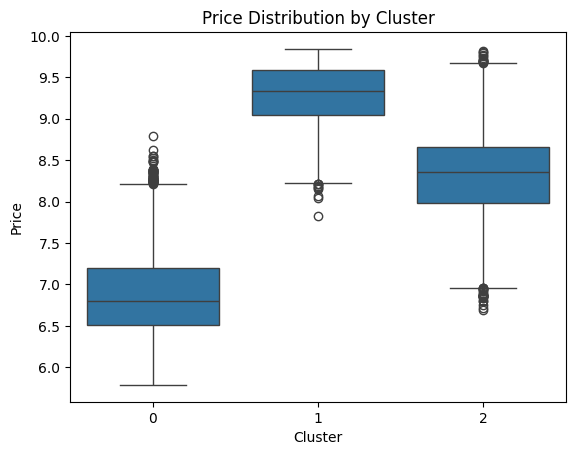

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=full_df, x="cluster", y="price")
plt.title("Price Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Price")
plt.show()


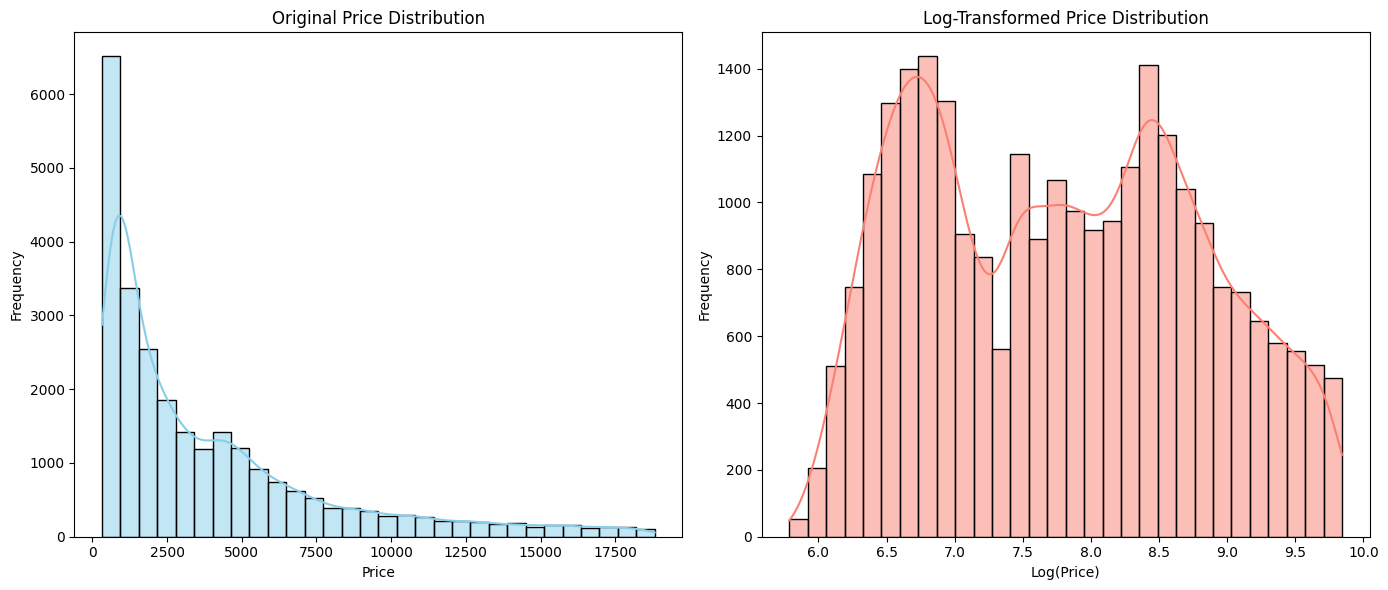

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Plotting price distributions
# -------------------------------

plt.figure(figsize=(14, 6))

# Original distribution (before log)
plt.subplot(1, 2, 1)
sns.histplot(np.exp(lr_df['price']), kde=True, bins=30, color='skyblue')  # exp to get back original
plt.title("Original Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Log-transformed distribution (after log)
plt.subplot(1, 2, 2)
sns.histplot(lr_df['price'], kde=True, bins=30, color='salmon')
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import skew, kurtosis
import numpy as np

# Original price (before log)
original_price = np.exp(lr_df['price'])  # reverse log if column is already log-transformed

# Log-transformed price (current column)
log_price = lr_df['price']

# Compute skewness and kurtosis
original_skew = skew(original_price)
original_kurt = kurtosis(original_price)

log_skew = skew(log_price)
log_kurt = kurtosis(log_price)

print("Original Price Distribution:")
print(f"Skewness: {original_skew:.4f}, Kurtosis: {original_kurt:.4f}\n")

print("Log-Transformed Price Distribution:")
print(f"Skewness: {log_skew:.4f}, Kurtosis: {log_kurt:.4f}")


Original Price Distribution:
Skewness: 1.6205, Kurtosis: 2.1614

Log-Transformed Price Distribution:
Skewness: 0.1279, Kurtosis: -1.1001


In [ ]:
import pandas as pd
import numpy as np

# Build train dataframe
train_df = X_train.copy()
train_df['log_price'] = y_train.values

# Build test dataframe
test_df = X_test.copy()
test_df['log_price'] = y_test.values

# Combine
final_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

# Recover original price (optional but recommended for interpretation)
final_df['price'] = np.exp(final_df['log_price'])


In [ ]:
cluster_price_summary = final_df.groupby('cluster').agg(
    Mean_Log_Price=('log_price', 'mean'),
    Std_Log_Price=('log_price', 'std'),
    Mean_Price=('price', 'mean'),
    Std_Price=('price', 'std'),
    Count=('price', 'count')
).reset_index()

cluster_price_summary


,cluster,Mean_Log_Price,Std_Log_Price,Mean_Price,Std_Price,Count
0,0,6.863085,0.474265,1077.116769,580.494747,12195
1,1,9.287119,0.368394,11499.387998,3846.244594,3616
2,2,8.335025,0.471632,4653.920515,2276.420542,10417


In [ ]:
from scipy.stats import f_oneway

clusters = final_df['cluster'].unique()

grouped_log_prices = [
    final_df[final_df['cluster'] == c]['log_price']
    for c in clusters
]

anova_stat, p_value = f_oneway(*grouped_log_prices)

print(f"ANOVA F-statistic: {anova_stat:.4f}")
print(f"p-value: {p_value:.6f}")


ANOVA F-statistic: 51207.2626
p-value: 0.000000


Re-fitting KMeans with k=3...

Cluster Counts (Should show 3 clusters):
cluster
0    12195
1     3616
2    10417
Name: count, dtype: int64

 ANALYSIS FOR: CUT

Highest Frequency 'cut' in each cluster:
   Cluster Most Frequent cut
0        0             Ideal
1        1           Premium
2        2             Ideal


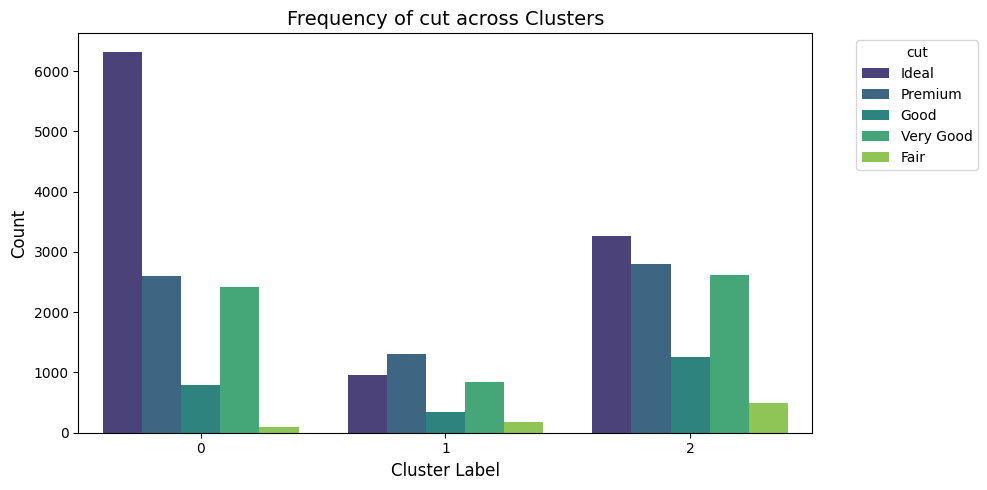


 ANALYSIS FOR: COLOR

Highest Frequency 'color' in each cluster:
   Cluster Most Frequent color
0        0                   E
1        1                   I
2        2                   G


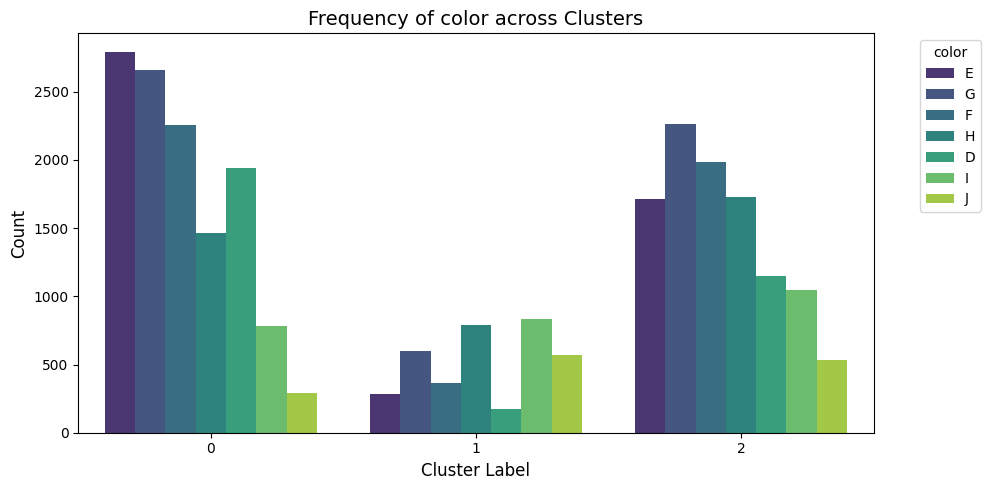


 ANALYSIS FOR: CLARITY

Highest Frequency 'clarity' in each cluster:
   Cluster Most Frequent clarity
0        0                   VS2
1        1                   SI2
2        2                   SI1


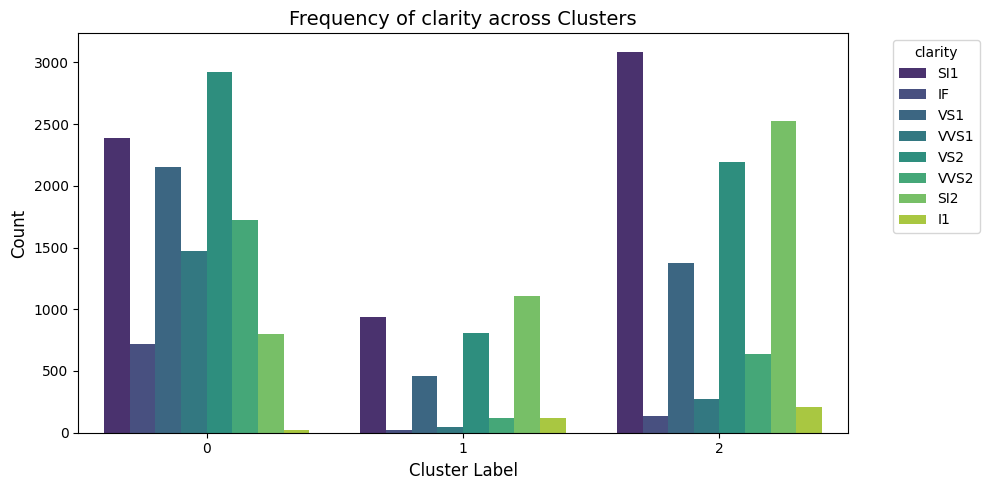

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# ---------------------------------------------------------
# 1. Reset Data & Re-Train Model (To ensure clean state)
# ---------------------------------------------------------
# Ensure we don't have accidental 'cluster' columns in our features
if 'cluster' in X_processed_df.columns:
    X_processed_df = X_processed_df.drop(columns=['cluster'])
if 'cluster' in X_train.columns:
    X_train = X_train.drop(columns=['cluster'])

# Re-initialize and Fit KMeans with 3 clusters
print("Re-fitting KMeans with k=3...")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train) 

# ---------------------------------------------------------
# 2. Map Clusters to Original Data
# ---------------------------------------------------------
# Predict clusters for the FULL dataset
all_labels = kmeans.predict(X_processed_df)

# Create a clean analysis dataframe from the original text data
df_analysis = lr_df.copy()
df_analysis['cluster'] = all_labels

# Check if we have data in all clusters now
print("\nCluster Counts (Should show 3 clusters):")
print(df_analysis['cluster'].value_counts().sort_index())

# ---------------------------------------------------------
# 3. Analyze Categorical Variables
# ---------------------------------------------------------
categorical_cols = ['cut', 'color', 'clarity']

for col in categorical_cols:
    print(f"\n{'='*40}")
    print(f" ANALYSIS FOR: {col.upper()}")
    print(f"{'='*40}")
    
    # --- A. Find Highest Frequency Value (Mode) ---
    try:
        # Group by cluster and get the mode (most common value)
        mode_df = df_analysis.groupby('cluster')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else "No Data").reset_index()
        mode_df.columns = ['Cluster', f'Most Frequent {col}']
        
        print(f"\nHighest Frequency '{col}' in each cluster:")
        print(mode_df)
    except Exception as e:
        print(f"Could not calculate mode for {col}: {e}")
    
    # --- B. Plot Bar Chart ---
    plt.figure(figsize=(10, 5))
    
    # Count Plot
    sns.countplot(data=df_analysis, x='cluster', hue=col, palette='viridis')
    
    plt.title(f'Frequency of {col} across Clusters', fontsize=14)
    plt.xlabel('Cluster Label', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


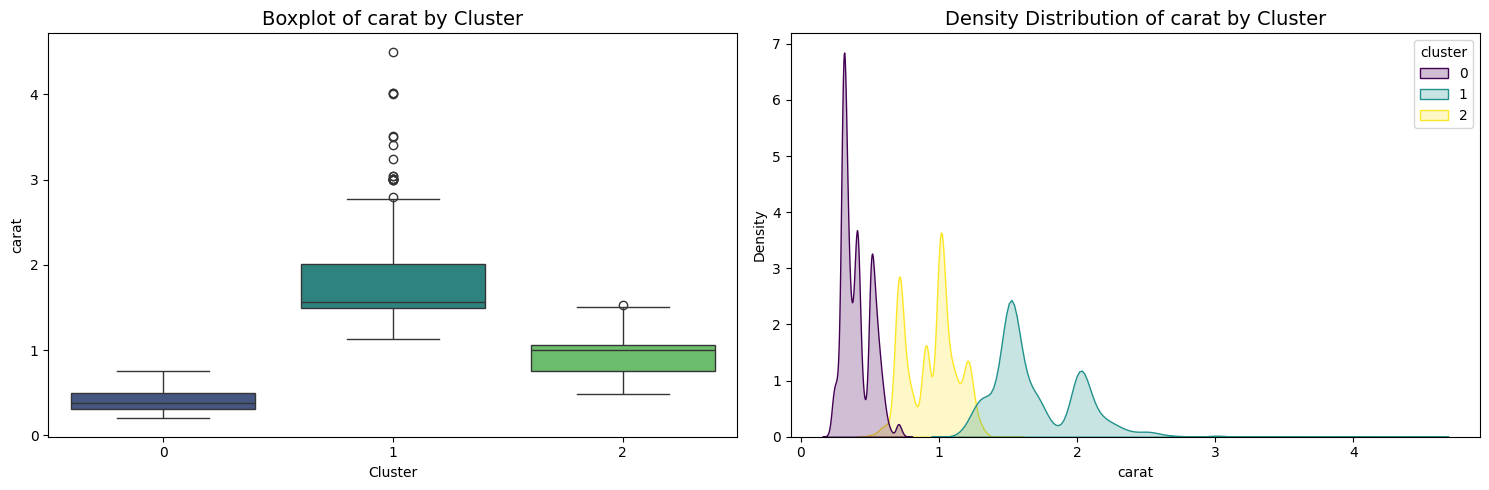

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


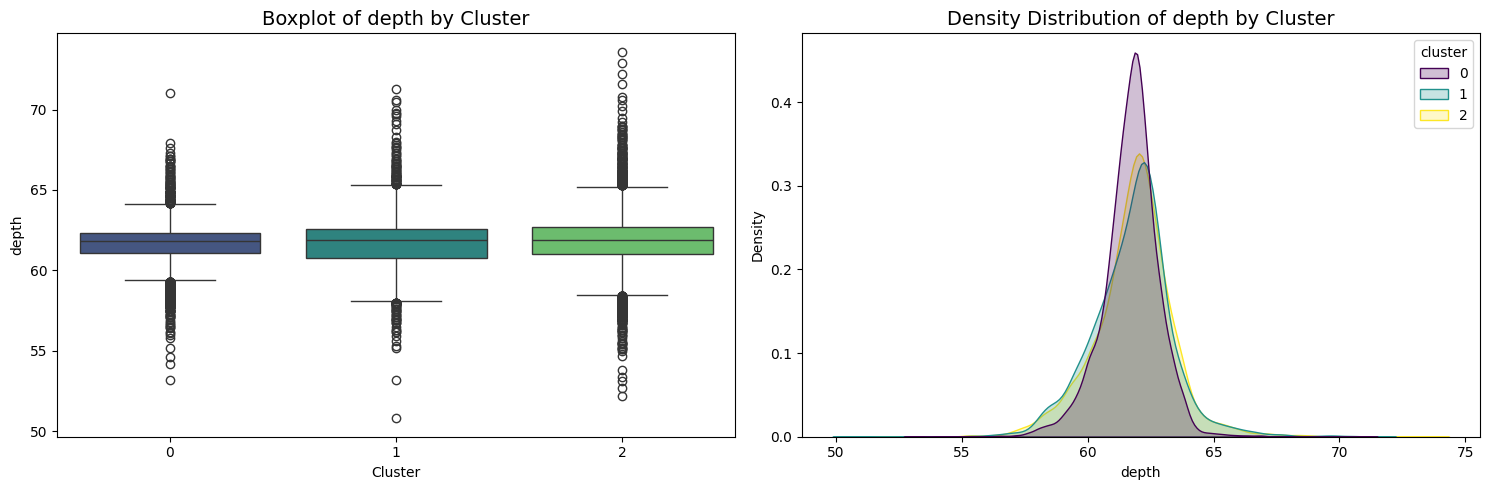

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


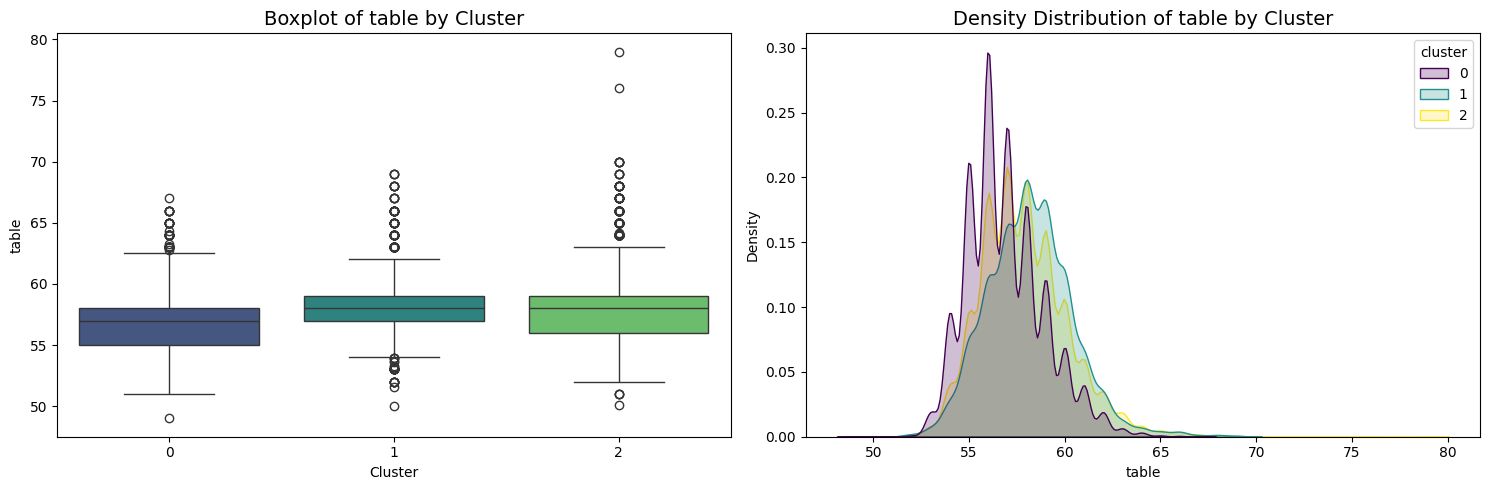

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


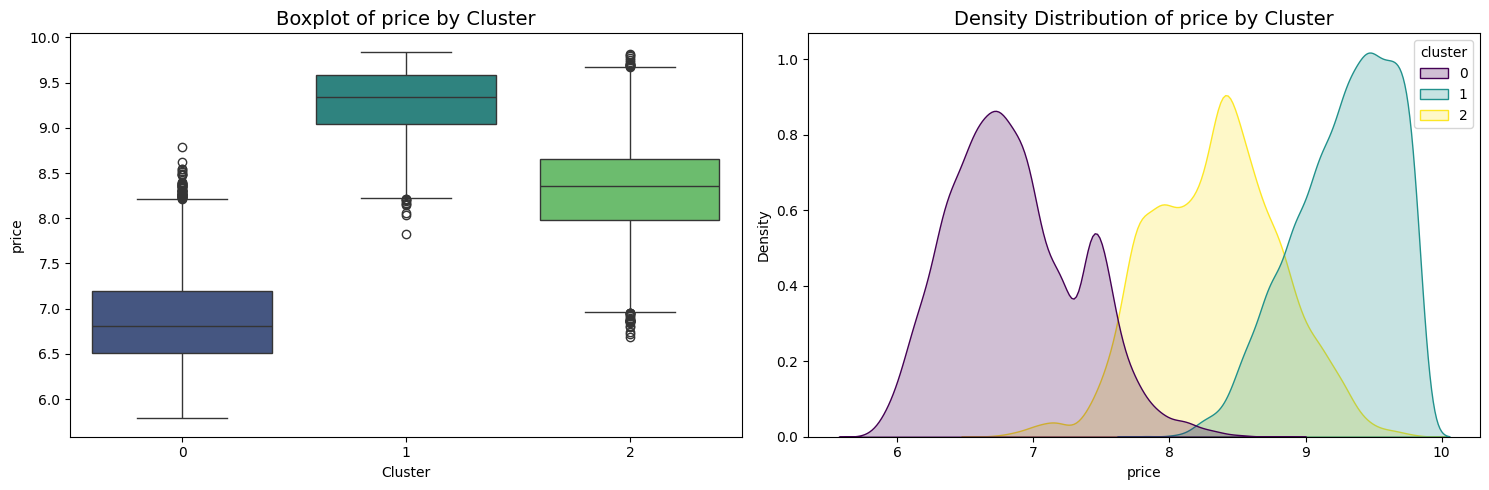

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


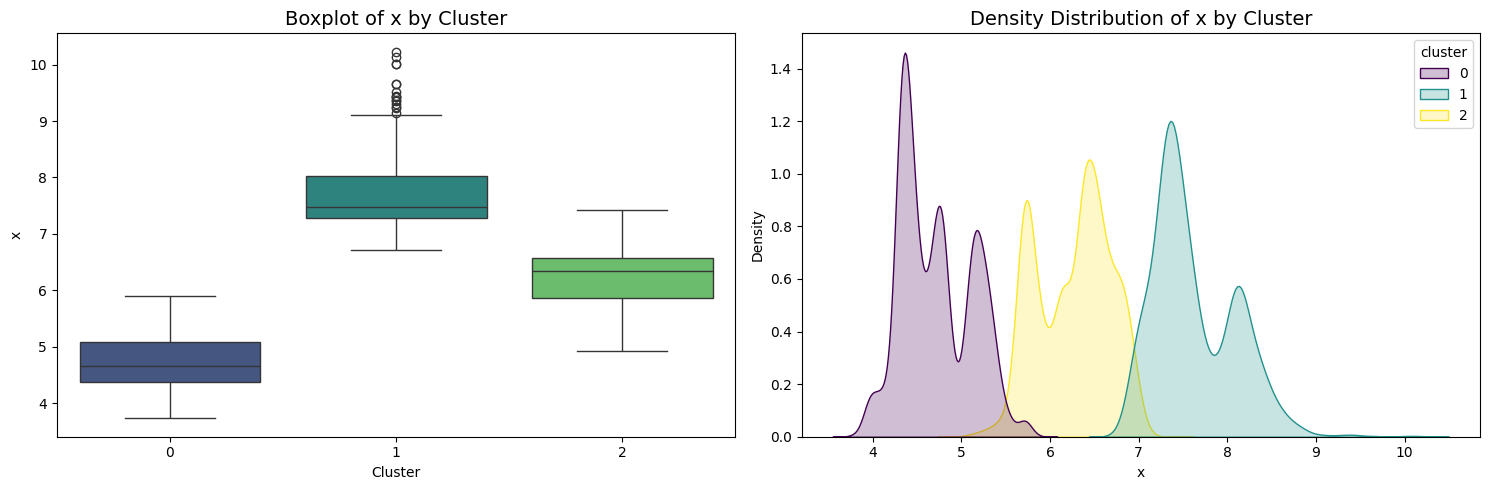

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


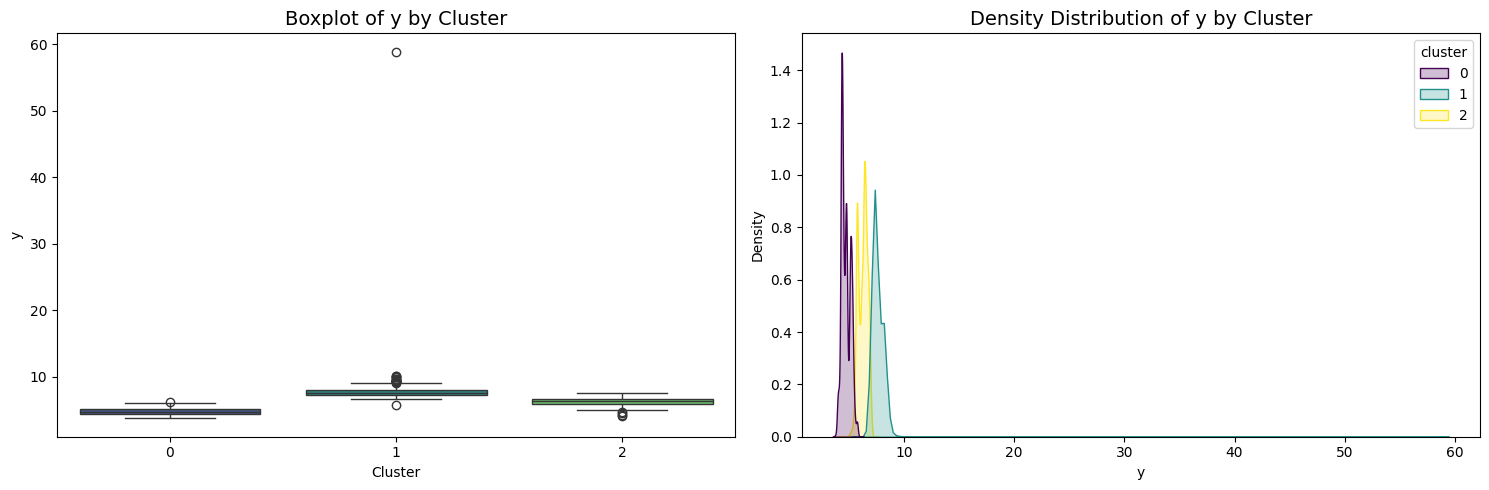

C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\2273426063.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])


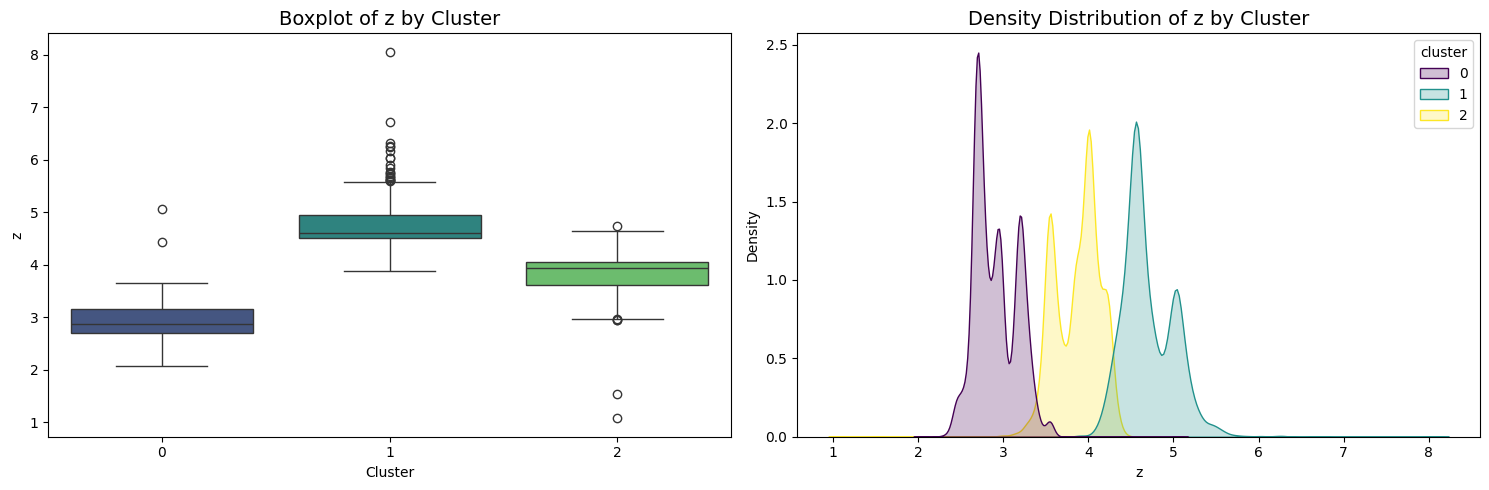


 SUMMARY STATISTICS BY CLUSTER
         carat  depth  table  price     x     y     z
cluster                                              
0         0.40  61.69  56.89   6.86  4.71  4.72  2.91
1         1.70  61.75  58.17   9.29  7.62  7.62  4.70
2         0.95  61.81  57.87   8.34  6.26  6.26  3.87


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define your continuous variables
# You can adjust this list based on your specific dataframe columns
continuous_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Check if 'log_price' exists and add it, as it's often useful
if 'log_price' in df_analysis.columns:
    continuous_cols.append('log_price')

# 2. Iterate and Plot
for col in continuous_cols:
    if col not in df_analysis.columns:
        continue

    # Set up the figure with 2 subplots (Boxplot and KDE plot)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # --- Chart 1: Boxplot (Good for comparing ranges & outliers) ---
    sns.boxplot(x='cluster', y=col, data=df_analysis, palette='viridis', ax=axes[0])
    axes[0].set_title(f'Boxplot of {col} by Cluster', fontsize=14)
    axes[0].set_xlabel('Cluster')
    axes[0].set_ylabel(col)
    
    # --- Chart 2: KDE Plot (Good for seeing the shape/density) ---
    # fill=True creates a filled area under the curve
    sns.kdeplot(data=df_analysis, x=col, hue='cluster', palette='viridis', fill=True, common_norm=False, ax=axes[1])
    axes[1].set_title(f'Density Distribution of {col} by Cluster', fontsize=14)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Density')
    
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------
# Optional: Summary Statistics Table
# ---------------------------------------------------------
print("\n" + "="*50)
print(" SUMMARY STATISTICS BY CLUSTER")
print("="*50)
summary = df_analysis.groupby('cluster')[continuous_cols].mean().round(2)
print(summary)

Analyzing Cluster 0 with XGBoost...


C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\3669866312.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')


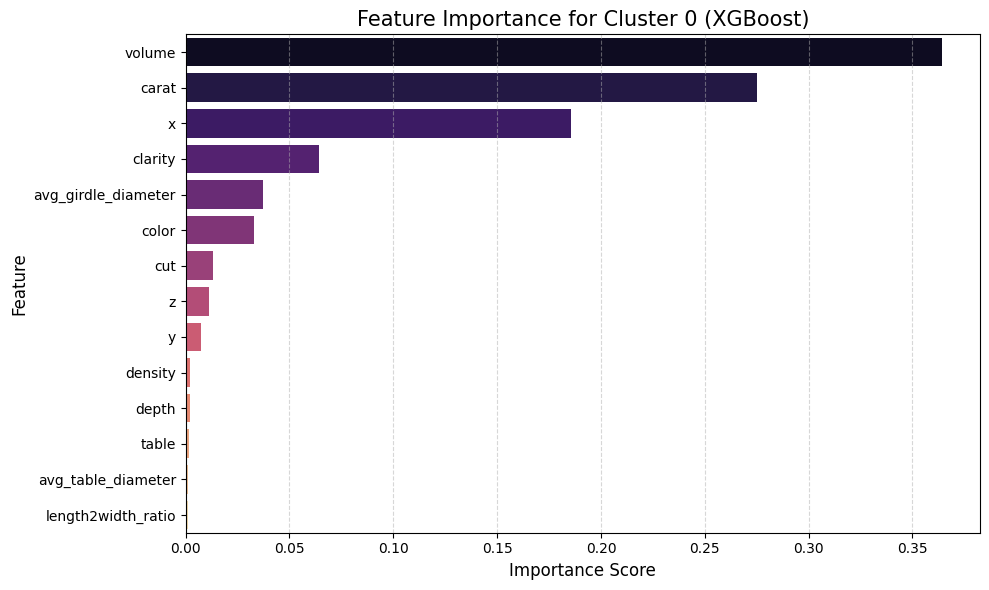

Top 3 Drivers of Price in Cluster 0:
  Feature  Importance
6  volume    0.364301
0   carat    0.275361
3       x    0.185783
--------------------------------------------------
Analyzing Cluster 1 with XGBoost...


C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\3669866312.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')


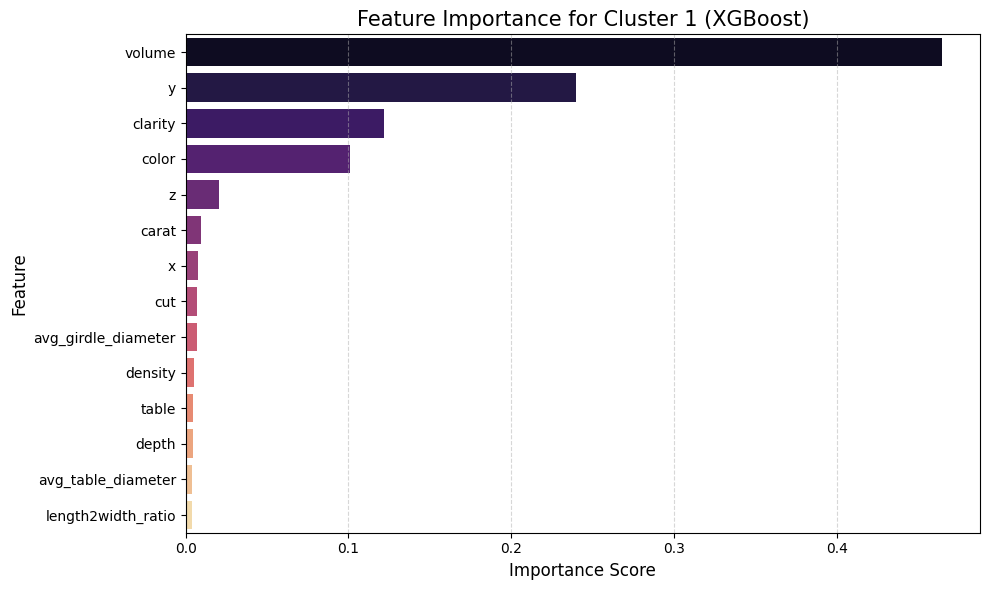

Top 3 Drivers of Price in Cluster 1:
    Feature  Importance
6    volume    0.464796
4         y    0.239933
13  clarity    0.121854
--------------------------------------------------
Analyzing Cluster 2 with XGBoost...


C:\Users\umasu\AppData\Local\Temp\ipykernel_26844\3669866312.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')


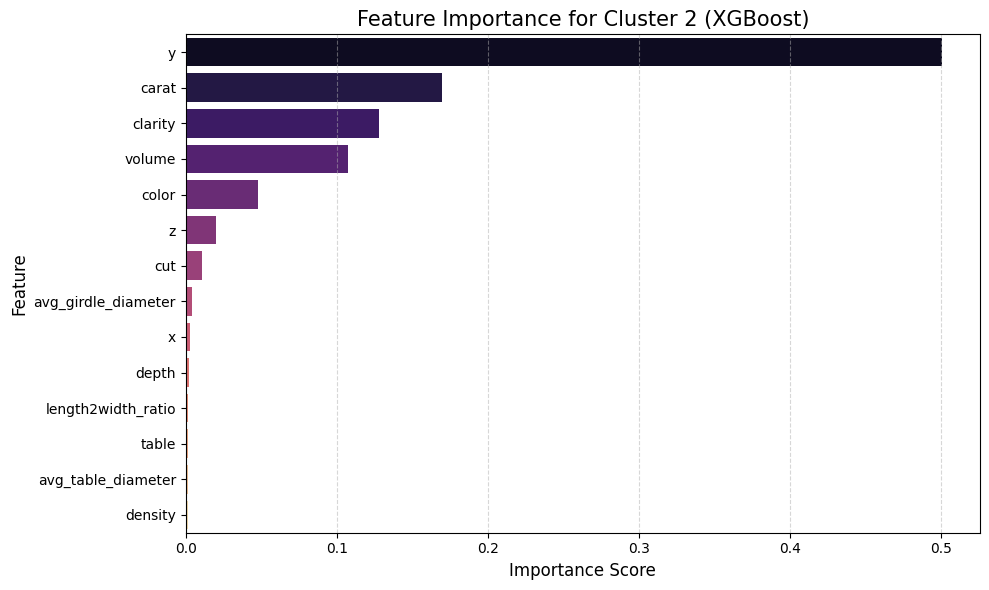

Top 3 Drivers of Price in Cluster 2:
    Feature  Importance
4         y    0.500863
0     carat    0.169794
13  clarity    0.127911
--------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

# ---------------------------------------------------------
# 1. Prepare Data
# ---------------------------------------------------------
xgb_data = X_train.copy()

# Remove 'cluster' if it's already there to avoid data leakage
if 'cluster' in xgb_data.columns:
    xgb_data = xgb_data.drop(columns=['cluster'])

# Predict clusters for the training data
train_clusters = kmeans.predict(xgb_data)

# Add target variable and cluster labels
xgb_data['log_price'] = y_train.values
xgb_data['cluster'] = train_clusters

# ---------------------------------------------------------
# 2. Loop Through Clusters & Calculate XGBoost Importance
# ---------------------------------------------------------
unique_clusters = sorted(xgb_data['cluster'].unique())

for c in unique_clusters:
    print(f"Analyzing Cluster {c} with XGBoost...")
    
    # A. Filter data for this cluster
    cluster_subset = xgb_data[xgb_data['cluster'] == c]
    
    # Separate Features (X) and Target (y)
    X_c = cluster_subset.drop(columns=['cluster', 'log_price'])
    y_c = cluster_subset['log_price']
    
    # B. Fit XGBoost Regressor
    # (Using default parameters, or paste your tuned parameters here)
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_c, y_c)
    
    # C. Extract Feature Importances
    # XGBoost offers different types: 'weight', 'gain', 'cover'. 
    # The standard .feature_importances_ property usually returns 'gain' (contribution to model accuracy).
    importances = xgb_model.feature_importances_
    
    # Create a DataFrame for plotting
    importance_df = pd.DataFrame({
        'Feature': X_c.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    # ---------------------------------------------------------
    # 3. Plot
    # ---------------------------------------------------------
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance_df, x='Importance', y='Feature', palette='magma')
    
    plt.title(f'Feature Importance for Cluster {c} (XGBoost)', fontsize=15)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Print top 3 features
    print(f"Top 3 Drivers of Price in Cluster {c}:")
    print(importance_df.head(3))
    print("-" * 50)

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------------------
# 1. Configuration
# ---------------------------------------------------------
# How many top features do you want to keep?
# You can change this number (e.g., 5 or 10) based on your previous plots
TOP_N_FEATURES = 5 

# Dictionary to store the final models and selected features for future use
cluster_models = {}

# ---------------------------------------------------------
# 2. Prepare Data
# ---------------------------------------------------------
xgb_data = X_train.copy()

# Remove 'cluster' if it's already there
if 'cluster' in xgb_data.columns:
    xgb_data = xgb_data.drop(columns=['cluster'])

# Predict clusters for the training data
train_clusters = kmeans.predict(xgb_data)
xgb_data['cluster'] = train_clusters
xgb_data['log_price'] = y_train.values

# ---------------------------------------------------------
# 3. Loop: Select Features -> Re-Fit
# ---------------------------------------------------------
unique_clusters = sorted(xgb_data['cluster'].unique())

for c in unique_clusters:
    print(f"\n{'='*40}")
    print(f" PROCESSING CLUSTER {c}")
    print(f"{'='*40}")
    
    # --- Step A: Get Data for Cluster ---
    cluster_subset = xgb_data[xgb_data['cluster'] == c]
    X_c = cluster_subset.drop(columns=['cluster', 'log_price'])
    y_c = cluster_subset['log_price']
    
    # --- Step B: Initial Fit to Find Importance ---
    # We fit a temporary model just to see what matters
    initial_model = XGBRegressor(n_estimators=100, random_state=42)
    initial_model.fit(X_c, y_c)
    
    # Get importances
    imp_df = pd.DataFrame({
        'Feature': X_c.columns,
        'Importance': initial_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    # --- Step C: Select Top Features ---
    selected_features = imp_df.head(TOP_N_FEATURES)['Feature'].tolist()
    print(f"Selected Top {TOP_N_FEATURES} Features: {selected_features}")
    
    # --- Step D: Re-Fit Model with ONLY Selected Features ---
    X_c_reduced = X_c[selected_features]
    
    final_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    final_model.fit(X_c_reduced, y_c)
    
    # --- Step E: Evaluate Performance (on Train) ---
    preds = final_model.predict(X_c_reduced)
    rmse = np.sqrt(mean_squared_error(y_c, preds))
    r2 = r2_score(y_c, preds)
    
    print(f"Final Training RMSE: {rmse:.4f}")
    print(f"Final Training R2:   {r2:.4f}")
    
    # Save for later use (e.g., predicting on test set)
    cluster_models[c] = {
        'model': final_model,
        'features': selected_features
    }

print("\nAll cluster models re-trained with optimized features!")


 PROCESSING CLUSTER 0
Selected Top 5 Features: ['carat', 'x', 'clarity', 'color', 'volume']
Final Training RMSE: 0.0908
Final Training R2:   0.9630

 PROCESSING CLUSTER 1
Selected Top 5 Features: ['volume', 'y', 'clarity', 'color', 'z']
Final Training RMSE: 0.0744
Final Training R2:   0.9598

 PROCESSING CLUSTER 2
Selected Top 5 Features: ['y', 'clarity', 'volume', 'carat', 'color']
Final Training RMSE: 0.0813
Final Training R2:   0.9702

All cluster models re-trained with optimized features!


PREDICTION & EVALUATION REPORT
Cluster 0 Performance:
  - Test Samples: 2431
  - RMSE: 0.1080
  - R²:   0.9499
----------------------------------------
Cluster 1 Performance:
  - Test Samples: 699
  - RMSE: 0.1151
  - R²:   0.8956
----------------------------------------
Cluster 2 Performance:
  - Test Samples: 2116
  - RMSE: 0.0953
  - R²:   0.9597
----------------------------------------

OVERALL MODEL PERFORMANCE (Weighted Average)
Overall Log RMSE: 0.1041
Overall R²:       0.9895
Mean Absolute Error (Original Price): $286.16


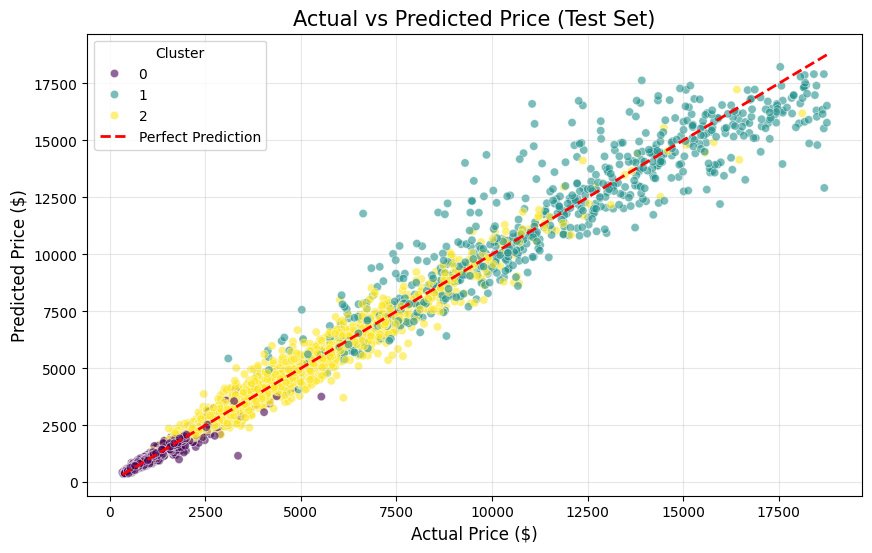

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ---------------------------------------------------------
# 1. Prepare Test Data
# ---------------------------------------------------------
# Create a copy to avoid modifying the original X_test
test_eval_df = X_test.copy()

# Ensure we don't have 'cluster' or 'log_price' in the input features
if 'cluster' in test_eval_df.columns:
    test_eval_df = test_eval_df.drop(columns=['cluster'])

# A. Predict which cluster each test sample belongs to
# We use the SAME kmeans model trained on training data
test_clusters = kmeans.predict(test_eval_df)
test_eval_df['cluster'] = test_clusters

# B. Attach Actual Prices (Target)
test_eval_df['actual_log_price'] = y_test.values

# Initialize a column for predictions
test_eval_df['predicted_log_price'] = 0.0

# ---------------------------------------------------------
# 2. Predict Using Cluster-Specific Models
# ---------------------------------------------------------
print("PREDICTION & EVALUATION REPORT")
print("="*60)

# We loop through the clusters that exist in our trained models
for c in sorted(cluster_models.keys()):
    
    # Get the specific model and features for this cluster
    model_info = cluster_models[c]
    model = model_info['model']
    features = model_info['features']
    
    # Identify test rows that belong to this cluster
    mask = test_eval_df['cluster'] == c
    
    # If there are no test samples for this cluster, skip
    if mask.sum() == 0:
        print(f"Cluster {c}: No samples in test set.")
        continue
        
    # Select ONLY the features used during training for this cluster
    X_test_subset = test_eval_df.loc[mask, features]
    
    # Predict
    preds = model.predict(X_test_subset)
    
    # Store predictions in the main dataframe
    test_eval_df.loc[mask, 'predicted_log_price'] = preds
    
    # --- Evaluation for this Cluster ---
    y_true_c = test_eval_df.loc[mask, 'actual_log_price']
    rmse_c = np.sqrt(mean_squared_error(y_true_c, preds))
    r2_c = r2_score(y_true_c, preds)
    
    print(f"Cluster {c} Performance:")
    print(f"  - Test Samples: {mask.sum()}")
    print(f"  - RMSE: {rmse_c:.4f}")
    print(f"  - R²:   {r2_c:.4f}")
    print("-" * 40)

# ---------------------------------------------------------
# 3. Overall Evaluation
# ---------------------------------------------------------
# Recover original price scale (exponential)
test_eval_df['actual_price'] = np.exp(test_eval_df['actual_log_price'])
test_eval_df['predicted_price'] = np.exp(test_eval_df['predicted_log_price'])

rmse_total = np.sqrt(mean_squared_error(test_eval_df['actual_log_price'], test_eval_df['predicted_log_price']))
r2_total = r2_score(test_eval_df['actual_log_price'], test_eval_df['predicted_log_price'])
mae_price = mean_absolute_error(test_eval_df['actual_price'], test_eval_df['predicted_price'])

print("\nOVERALL MODEL PERFORMANCE (Weighted Average)")
print("="*60)
print(f"Overall Log RMSE: {rmse_total:.4f}")
print(f"Overall R²:       {r2_total:.4f}")
print(f"Mean Absolute Error (Original Price): ${mae_price:.2f}")

# ---------------------------------------------------------
# 4. Visualization: Actual vs Predicted
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_eval_df, x='actual_price', y='predicted_price', hue='cluster', palette='viridis', alpha=0.6)

# Plot perfect prediction line
min_val = min(test_eval_df['actual_price'].min(), test_eval_df['predicted_price'].min())
max_val = max(test_eval_df['actual_price'].max(), test_eval_df['predicted_price'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

plt.title('Actual vs Predicted Price (Test Set)', fontsize=15)
plt.xlabel('Actual Price ($)', fontsize=12)
plt.ylabel('Predicted Price ($)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Run this in a code cell
%pip install shap

Note: you may need to restart the kernel to use updated packages.



 SHAP ANALYSIS FOR CLUSTER 0
Analyzing 2431 samples in Cluster 0...


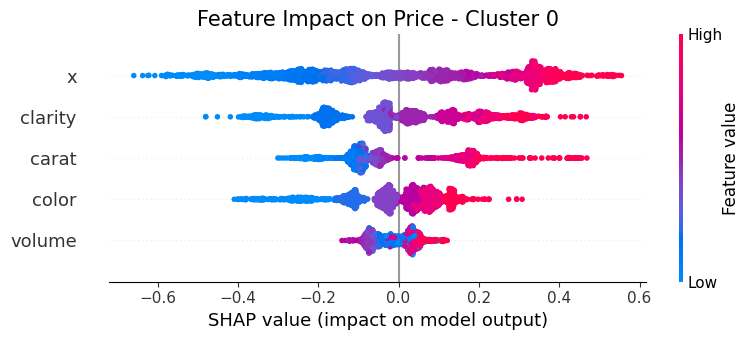

Top Feature for Cluster 0 is 'x'. Generating Dependence Plot...


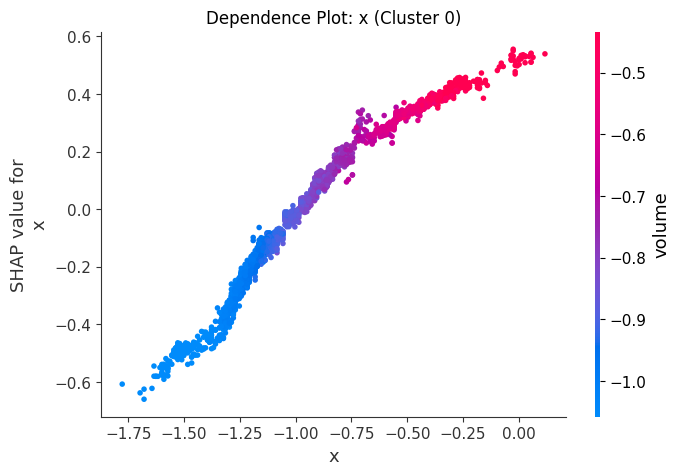

------------------------------------------------------------

 SHAP ANALYSIS FOR CLUSTER 1
Analyzing 699 samples in Cluster 1...


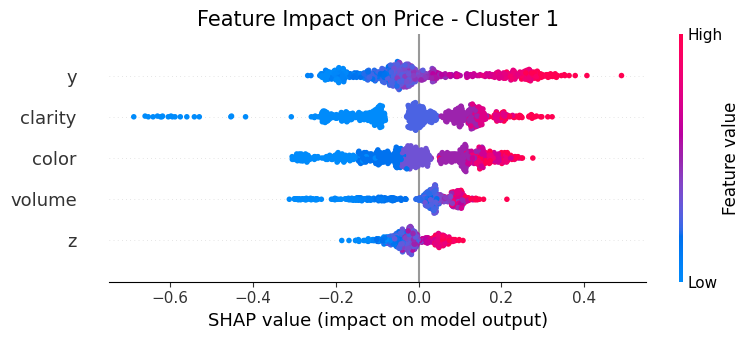

Top Feature for Cluster 1 is 'y'. Generating Dependence Plot...


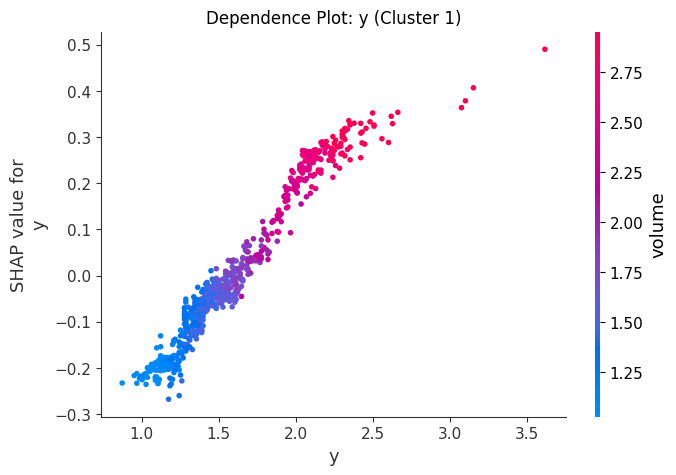

------------------------------------------------------------

 SHAP ANALYSIS FOR CLUSTER 2
Analyzing 2116 samples in Cluster 2...


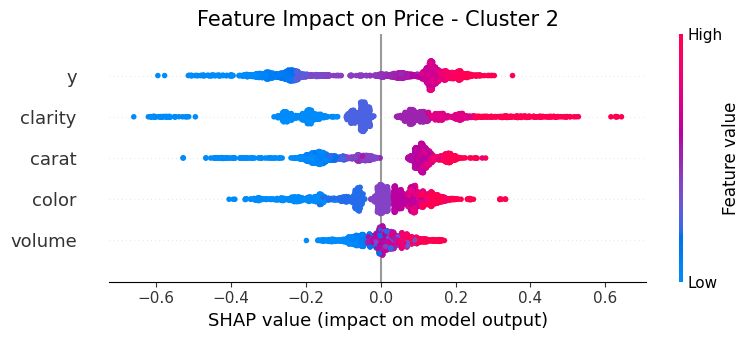

Top Feature for Cluster 2 is 'y'. Generating Dependence Plot...


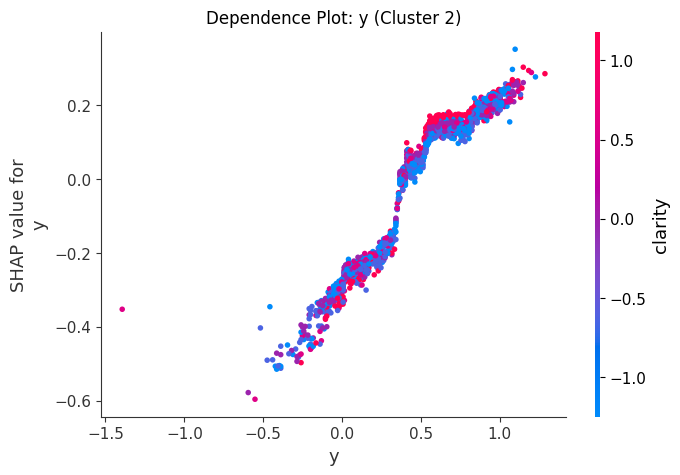

------------------------------------------------------------


In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Initialize JavaScript visualization (required for some SHAP plots)
shap.initjs()

# ---------------------------------------------------------
# Loop Through Each Cluster Model
# ---------------------------------------------------------
for c in sorted(cluster_models.keys()):
    print(f"\n{'='*60}")
    print(f" SHAP ANALYSIS FOR CLUSTER {c}")
    print(f"{'='*60}")

    # 1. Get Model & Features for this Cluster
    model_info = cluster_models[c]
    model = model_info['model']
    feature_names = model_info['features']

    # 2. Get Test Data for this Cluster
    # We use 'test_eval_df' (created in the Evaluation step) because it has the cluster labels
    mask = test_eval_df['cluster'] == c
    
    # Select ONLY the features used by this specific model
    X_test_c = test_eval_df.loc[mask, feature_names]

    if X_test_c.empty:
        print(f"No test data found for Cluster {c}. Skipping...")
        continue
        
    print(f"Analyzing {len(X_test_c)} samples in Cluster {c}...")

    # 3. Create SHAP Explainer
    # TreeExplainer is optimized for XGBoost
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_c)

    # ---------------------------------------------------------
    # 4. PLOT 1: Summary Plot (Feature Importance & Direction)
    # ---------------------------------------------------------
    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Impact on Price - Cluster {c}", fontsize=15)
    
    # summary_plot automatically sorts features by importance
    shap.summary_plot(shap_values, X_test_c, show=False)
    plt.tight_layout()
    plt.show()
    
    # ---------------------------------------------------------
    # 5. PLOT 2: Dependence Plot (Top Feature)
    # ---------------------------------------------------------
    # We automatically find the most important feature to plot
    # (It's usually the one with the highest mean absolute SHAP value)
    vals = np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
    top_feature = feature_importance.iloc[0]['col_name']
    
    print(f"Top Feature for Cluster {c} is '{top_feature}'. Generating Dependence Plot...")
    
    # Create Dependence Plot
    # This shows how the top feature affects price AND how it interacts with another feature
    shap.dependence_plot(top_feature, shap_values, X_test_c, show=False)
    plt.title(f"Dependence Plot: {top_feature} (Cluster {c})")
    plt.show()
    
    print("-" * 60)